# A brief analysis of political aspects in the world, OECD member countries and Mexico.

The purpose of this notebook is to show the results obtained by analyzing a "V-Dem Dataset v12" database containing information on some political aspects prevailing in the world. [Coppedge et al. (2022a)](#bibli)

In accordance with the above, the analysis is carried out from the general to the particular divided into four sections.

Thus, the first section mentions an analysis of the world, the second section deals with the OECD member countries, the following section mentions aspects about the country of Mexico and finally, in the last section, some conclusions of the analyzed data are exposed.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import json
from plotly.subplots import make_subplots
from scipy import stats
%matplotlib inline

#### Database

In [2]:
df = pd.read_csv('V-Dem_Small.csv')
df.head()

country_name  year  v2x_regime  e_regiongeo  e_gdppc  e_wb_pop  \
0       Mexico  1789         NaN           17    1.352       NaN   
1       Mexico  1790         NaN           17    1.357       NaN   
2       Mexico  1791         NaN           17    1.371       NaN   
3       Mexico  1792         NaN           17    1.389       NaN   
4       Mexico  1793         NaN           17    1.401       NaN   

                                          v2exnamhos v2exparhos  \
0  Juan Vicente de Guemes-Pacheco de Padilla y Ho...        NaN   
1  Juan Vicente de Guemes-Pacheco de Padilla y Ho...        NaN   
2  Juan Vicente de Guemes-Pacheco de Padilla y Ho...        NaN   
3  Juan Vicente de Guemes-Pacheco de Padilla y Ho...        NaN   
4  Juan Vicente de Guemes-Pacheco de Padilla y Ho...        NaN   

   v2exrescon_osp  v2exbribe_osp  ...  v2slpname  v2ellostss v2tlpname  \
0           1.353          2.397  ...        NaN         NaN       NaN   
1           1.353          2.397  ...        NaN         NaN       NaN   
2           1.353          2.397  ...        NaN         NaN       NaN   
3           1.353          2.397  ...        NaN         NaN       NaN   
4           1.353          2.397  ...        NaN         NaN       NaN   

   v2ellostts v2jupurge_osp  v2jupoatck_osp v2juaccnt_osp  v2jucorrdc_osp  \
0         NaN           NaN             NaN          1.93           1.596   
1         NaN           NaN             NaN          1.93           1.596   
2         NaN           NaN             NaN          1.93           1.596   
3         NaN           NaN             NaN          1.93           1.596   
4         NaN           NaN             NaN          1.93           1.596   

   v2juhcind_osp  v2juhccomp_osp  
0           2.96           0.721  
1           2.96           0.721  
2           2.96           0.721  
3           2.96           0.721  
4           2.96           0.721  

[5 rows x 24 columns]

In [3]:
print("The database has",df.shape[0],"rows and",df.shape[1],"columns")

The database has 27380 rows and 24 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27380 entries, 0 to 27379
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    27380 non-null  object 
 1   year            27380 non-null  int64  
 2   v2x_regime      19043 non-null  float64
 3   e_regiongeo     27380 non-null  int64  
 4   e_gdppc         22153 non-null  float64
 5   e_wb_pop        9906 non-null   float64
 6   v2exnamhos      27365 non-null  object 
 7   v2exparhos      17730 non-null  object 
 8   v2exrescon_osp  25577 non-null  float64
 9   v2exbribe_osp   26543 non-null  float64
 10  v2exembez_osp   26373 non-null  float64
 11  v2lgcrrpt_osp   17719 non-null  float64
 12  v2lpname        3387 non-null   object 
 13  v2ellostsl      3130 non-null   float64
 14  v2slpname       2898 non-null   object 
 15  v2ellostss      2907 non-null   float64
 16  v2tlpname       2208 non-null   object 
 17  v2ellostts      1760 non-null  

In [5]:
df.describe()

year    v2x_regime   e_regiongeo       e_gdppc      e_wb_pop  \
count  27380.000000  19043.000000  27380.000000  22153.000000  9.906000e+03   
mean    1927.764609      0.874179      9.264317      6.418271  3.198054e+07   
std       64.228350      1.062646      5.726041     10.781935  1.174815e+08   
min     1789.000000      0.000000      1.000000      0.286000  4.170000e+04   
25%     1879.000000      0.000000      4.000000      1.516000  2.316838e+06   
50%     1938.000000      0.000000      8.000000      2.373000  7.089805e+06   
75%     1982.000000      2.000000     14.000000      6.303000  2.064911e+07   
max     2021.000000      3.000000     19.000000    156.628000  1.410929e+09   

       v2exrescon_osp  v2exbribe_osp  v2exembez_osp  v2lgcrrpt_osp  \
count    25577.000000   26543.000000   26373.000000   17719.000000   
mean         1.963834       2.008916       2.209687       2.125963   
std          1.024435       1.080424       1.167379       0.942229   
min          0.026000       0.067000       0.045000       0.111000   
25%          1.094000       1.104000       1.249000       1.314000   
50%          2.088000       2.025000       2.344000       2.148000   
75%          2.824000       2.913000       3.232000       2.876000   
max          3.819000       3.936000       3.960000       3.947000   

        v2ellostsl   v2ellostss   v2ellostts  v2jupurge_osp  v2jupoatck_osp  \
count  3130.000000  2907.000000  1760.000000   18806.000000    18911.000000   
mean     56.193418    24.058428    11.008584       2.812304        3.138805   
std      22.840537    12.690963     6.746186       0.947517        0.746061   
min       2.000000     0.000000     0.000000       0.017000        0.060000   
25%      39.838000    15.297000     5.900000       2.158000        2.653000   
50%      53.162500    24.064000    10.700000       3.084500        3.402000   
75%      70.000000    32.800000    15.472000       3.601000        3.746000   
max     100.000000    83.330000    47.287000       3.976000        3.987000   

       v2juaccnt_osp  v2jucorrdc_osp  v2juhcind_osp  v2juhccomp_osp  
count   26941.000000    26873.000000   23127.000000    23101.000000  
mean        1.866628        2.445482       1.856389        2.322776  
std         0.891468        0.812699       1.022475        0.992967  
min         0.120000        0.281000       0.030000        0.050000  
25%         1.133000        1.763000       0.995000        1.525000  
50%         1.814000        2.563000       1.802000        2.555000  
75%         2.608000        3.137000       2.708000        3.105000  
max         3.845000        3.925000       3.900000        3.871000

## World by country

In [6]:
countries = open('world_countries.json')
world_geo = json.load(countries)

In [7]:
df_w_r = df[['country_name', 'year', 'v2x_regime', 'e_regiongeo']]
df_w_r = df_w_r.dropna(axis='rows', how='any')
df_w_r.head()

country_name  year  v2x_regime  e_regiongeo
111       Mexico  1900         0.0           17
112       Mexico  1901         0.0           17
113       Mexico  1902         0.0           17
114       Mexico  1903         0.0           17
115       Mexico  1904         0.0           17

#### How many countries are in the database?

In [8]:
print("There are " + str(df_w_r['country_name'].nunique()) + " countries in the database")

There are 183 countries in the database


#### Regimes of the World is an index in which political regimes can be classified into four types according to the following classification:

#### Closed Autocracy:
- No de-facto multiparty, or free and fair elections, or Dahl’s institutional prerequisites not minimally fulfilled
- No multiparty elections for the chief executive for the legislature.

#### Electoral Autocracy:
- No de-facto multiparty, or free and fair elections, or Dahl’s institutional prerequisites not minimally fulfilled
- De-jure multiparty elections for the chief executive for the legislature.

#### Electoral Democracy:
- De-facto multiparty, free and fair elections, and Dahl’s institutional prerequisites minimally fulfilled
- The rule of law, or liberal principles not satisfied.

#### Liberal Democracy:
- De-facto multiparty, free and fair elections, and Dahl’s institutional prerequisites minimally fulfilled 
- The rule of law, and liberal principles satisfied.  [Lührmann et al. (2018)](#bibli)

v2x_regime:
0=Closed Autocracy
1=Electoral Autocracy
2=Electoral Democracy
3=Liberal Democracy [Coppedge et al. (2022b)](#bibli)

In [15]:
df_w_r_71 = df_w_r.loc[df_w_r['year'].isin([1971])]
df_w_r_71.head(10)

country_name  year  v2x_regime  e_regiongeo
182         Mexico  1971         1.0           17
304       Suriname  1971         2.0           18
537         Sweden  1971         3.0            2
761    Switzerland  1971         3.0            1
881          Ghana  1971         1.0            6
1003  South Africa  1971         1.0            9
1236         Japan  1971         3.0           12
1469       Myanmar  1971         0.0           13
1702        Russia  1971         0.0            4
1812       Albania  1971         0.0            3

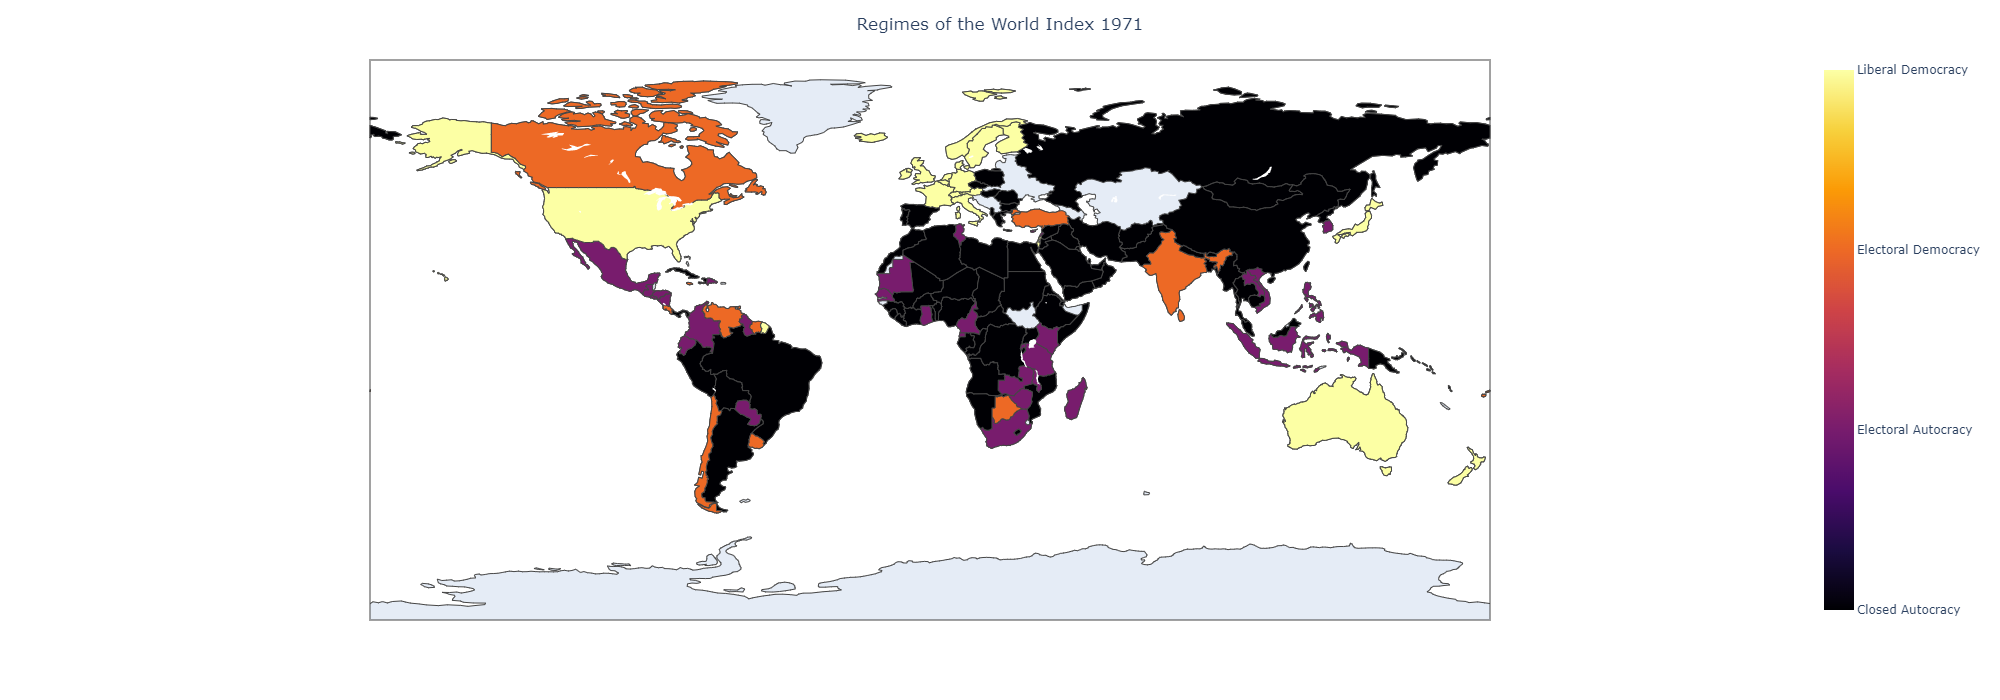

In [57]:
fig1a = px.choropleth(df_w_r_71, locations='country_name', 
                     color='v2x_regime', 
                     geojson=world_geo, 
                     featureidkey='properties.name', 
                     hover_name='country_name', 
                     color_continuous_scale='inferno')

fig1a.update_layout(autosize=False, 
                   width=2000, height=700, 
                   title="Regimes of the World Index 1971", 
                   title_x=0.5,
                   coloraxis_colorbar=dict(title=" ",
                                           tickvals=[0,1,2,3],
                                           ticktext=["Closed Autocracy",
                                                     "Electoral Autocracy",
                                                     "Electoral Democracy", 
                                                     "Liberal Democracy"]))

fig1a.show()

In [17]:
df_w_r_21 = df_w_r.loc[df_w_r['year'].isin([2021])]
df_w_r_21.head(10)

country_name  year  v2x_regime  e_regiongeo
232         Mexico  2021         2.0           17
354       Suriname  2021         2.0           18
587         Sweden  2021         3.0            2
811    Switzerland  2021         3.0            1
931          Ghana  2021         2.0            6
1053  South Africa  2021         2.0            9
1286         Japan  2021         3.0           12
1519       Myanmar  2021         0.0           13
1752        Russia  2021         1.0            4
1862       Albania  2021         1.0            3

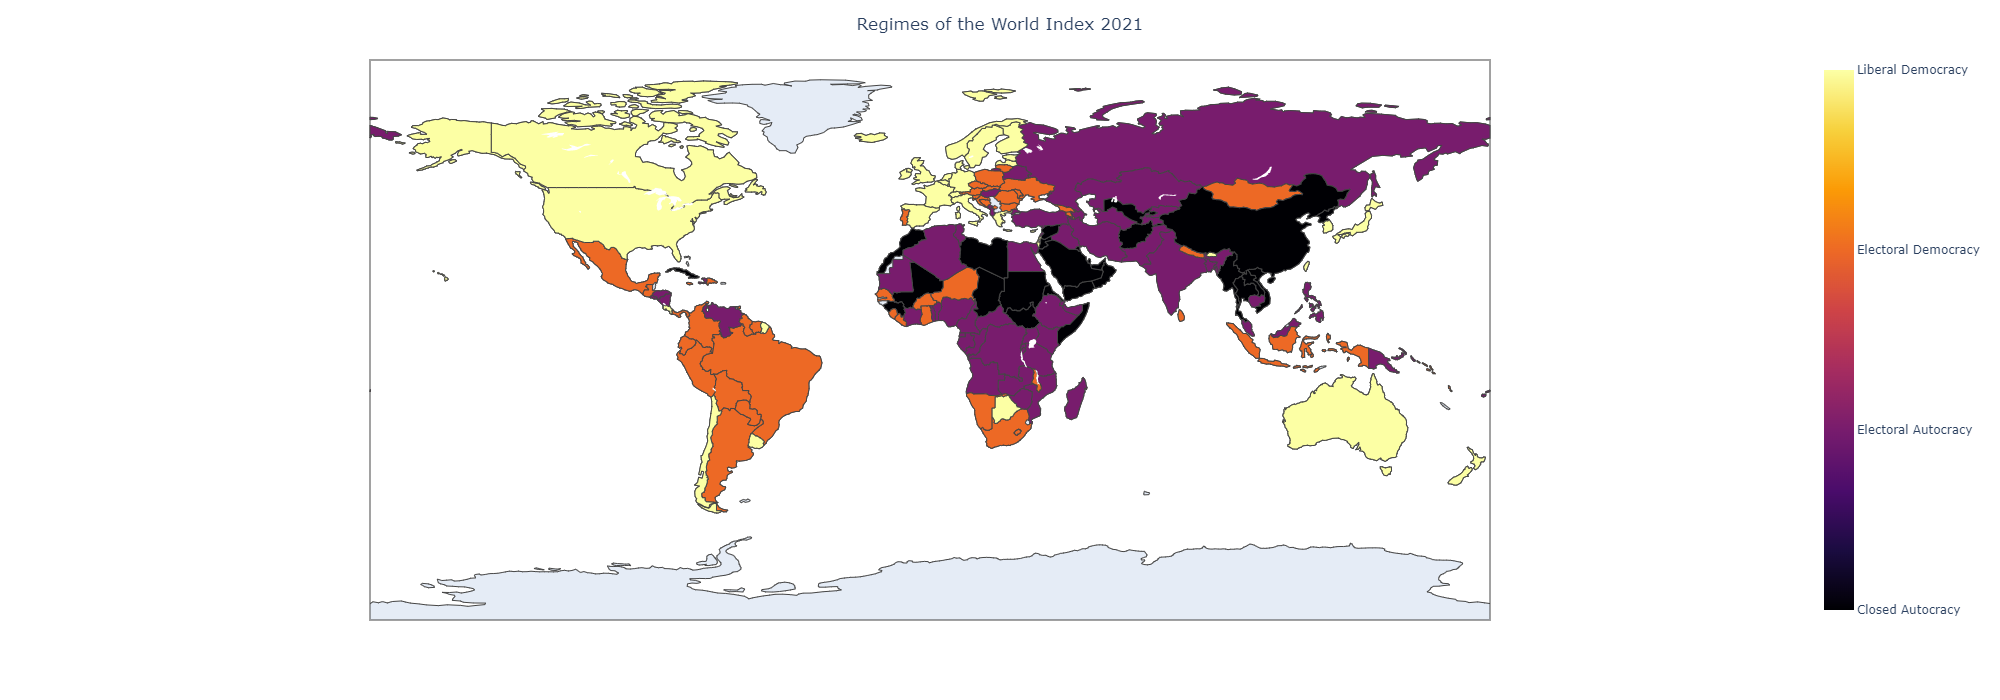

In [58]:
fig1b = px.choropleth(df_w_r_21, locations='country_name', 
                     color='v2x_regime', 
                     geojson=world_geo, 
                     featureidkey='properties.name', 
                     hover_name='country_name', 
                     color_continuous_scale='inferno')

fig1b.update_layout(autosize=False, 
                   width=2000, height=700, 
                   title="Regimes of the World Index 2021", 
                   title_x=0.5,
                   coloraxis_colorbar=dict(title=" ",
                                           tickvals=[0,1,2,3],
                                           ticktext=["Closed Autocracy",
                                                     "Electoral Autocracy",
                                                     "Electoral Democracy", 
                                                     "Liberal Democracy"]))

fig1b.show()

#### What have been the 10 best years that countries around the world have had in terms of Regimes of the World Index?

In [19]:
df_w_r.groupby(['year'])['v2x_regime'].mean().sort_values(ascending=False).head(10)

year
2012    1.653631
2011    1.642458
2010    1.634831
2015    1.625698
2014    1.625698
2017    1.620112
2009    1.617978
2016    1.614525
2005    1.610169
2013    1.608939
Name: v2x_regime, dtype: float64

In [20]:
df_w_r['e_regiongeo'] = df_w_r.loc[:, 'e_regiongeo'].replace({1: 'Western Europe', 2: 'Northern Europe', 3: 'Southern Europe', 4: 'Eastern Europe', 5: 'Northern Africa', 
                                                              6: 'Western Africa', 7: 'Middle Africa', 8: 'Eastern Africa', 9: 'Southern Africa', 10: 'Western Asia', 
                                                              11: 'Central Asia', 12: 'Eastern Asia', 13: 'South-Eastern Asia', 14: 'Southern Asia', 15: 'Oceania',
                                                              16: 'North America', 17: 'Central America', 18: 'South America', 19: 'Caribbean'})

In [21]:
df_w_r.head()

country_name  year  v2x_regime      e_regiongeo
111       Mexico  1900         0.0  Central America
112       Mexico  1901         0.0  Central America
113       Mexico  1902         0.0  Central America
114       Mexico  1903         0.0  Central America
115       Mexico  1904         0.0  Central America

#### What was the highest-ranked greographic region in the world by Regimes of the World Index in 2021?

In [22]:
df_w_r = df_w_r.loc[df_w_r['year'].isin([2021])]
df_w_r = df_w_r.groupby(['e_regiongeo'], as_index=False).mean().sort_values(by='v2x_regime', ascending=False)
df_w_r = df_w_r.reset_index(drop=True)
df_w_r

e_regiongeo    year  v2x_regime
0        North America  2021.0    3.000000
1      Northern Europe  2021.0    2.900000
2       Western Europe  2021.0    2.857143
3        South America  2021.0    2.083333
4              Oceania  2021.0    2.000000
5      Southern Europe  2021.0    2.000000
6      Southern Africa  2021.0    1.800000
7      Central America  2021.0    1.714286
8       Eastern Europe  2021.0    1.700000
9            Caribbean  2021.0    1.666667
10        Eastern Asia  2021.0    1.571429
11       Southern Asia  2021.0    1.444444
12      Western Africa  2021.0    1.375000
13      Eastern Africa  2021.0    1.050000
14       Middle Africa  2021.0    1.000000
15        Central Asia  2021.0    0.800000
16  South-Eastern Asia  2021.0    0.800000
17        Western Asia  2021.0    0.789474
18     Northern Africa  2021.0    0.500000

In [23]:
print("The highest-ranked greographic region in the Regimes of the World Index in 2021 was " + df_w_r.loc[0,'e_regiongeo'])

The highest-ranked greographic region in the Regimes of the World Index in 2021 was North America


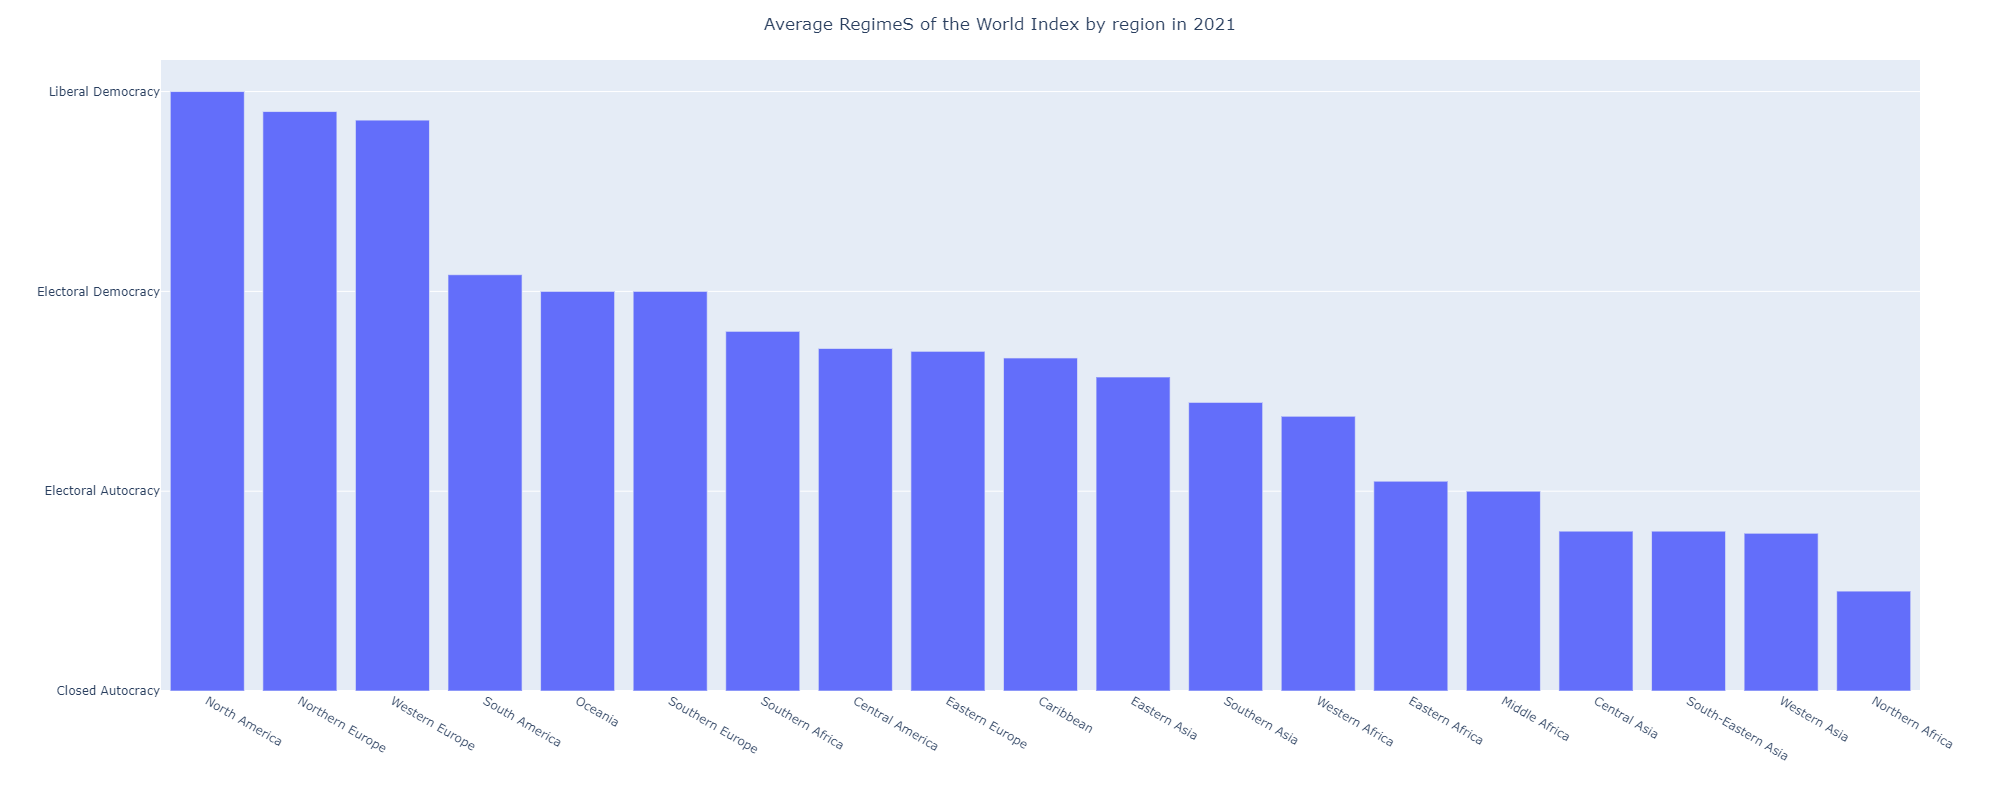

In [24]:
fig2 = px.bar(df_w_r, x='e_regiongeo', y='v2x_regime', labels={"e_regiongeo": " ",  "v2x_regime": " "})

fig2.update_layout(autosize=False, width=2000, height=800, 
                   title="Average RegimeS of the World Index by region in 2021", 
                   title_x=0.5,
                   yaxis=dict(tickvals=[0,1,2,3], 
                              ticktext=["Closed Autocracy",
                                        "Electoral Autocracy",
                                        "Electoral Democracy", 
                                        "Liberal Democracy"]))

fig2.show()

## OECD member countries

In [25]:
df_oecd = df[['country_name', 'year', 'v2x_regime']]
df_oecd = df_oecd.dropna(axis='rows', how='any')
df_oecd = df_oecd.loc[df_oecd['country_name'].isin(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia', 
                                                    'Costa Rica', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 
                                                    'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 
                                                    'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 
                                                    'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 
                                                    'Portugal', 'Slovakia', 'Slovenia', 'South Korea', 'Spain', 
                                                    'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States of America'])]

df_oecd.head()

country_name  year  v2x_regime
111       Mexico  1900         0.0
112       Mexico  1901         0.0
113       Mexico  1902         0.0
114       Mexico  1903         0.0
115       Mexico  1904         0.0

#### How many countries are members of the OECD?

In [26]:
print("There are " + str(df_oecd['country_name'].nunique()) + " OECD member countries")

There are 38 OECD member countries


#### What have been the 10 best years that OECD member countries have had in terms of Regimes of the World Index?

In [27]:
df_oecd.groupby(['year'])['v2x_regime'].mean().sort_values(ascending=False).head(10)

year
2010    2.894737
2009    2.894737
2012    2.894737
2011    2.894737
2000    2.868421
2001    2.868421
2002    2.868421
2003    2.868421
2004    2.868421
2005    2.868421
Name: v2x_regime, dtype: float64

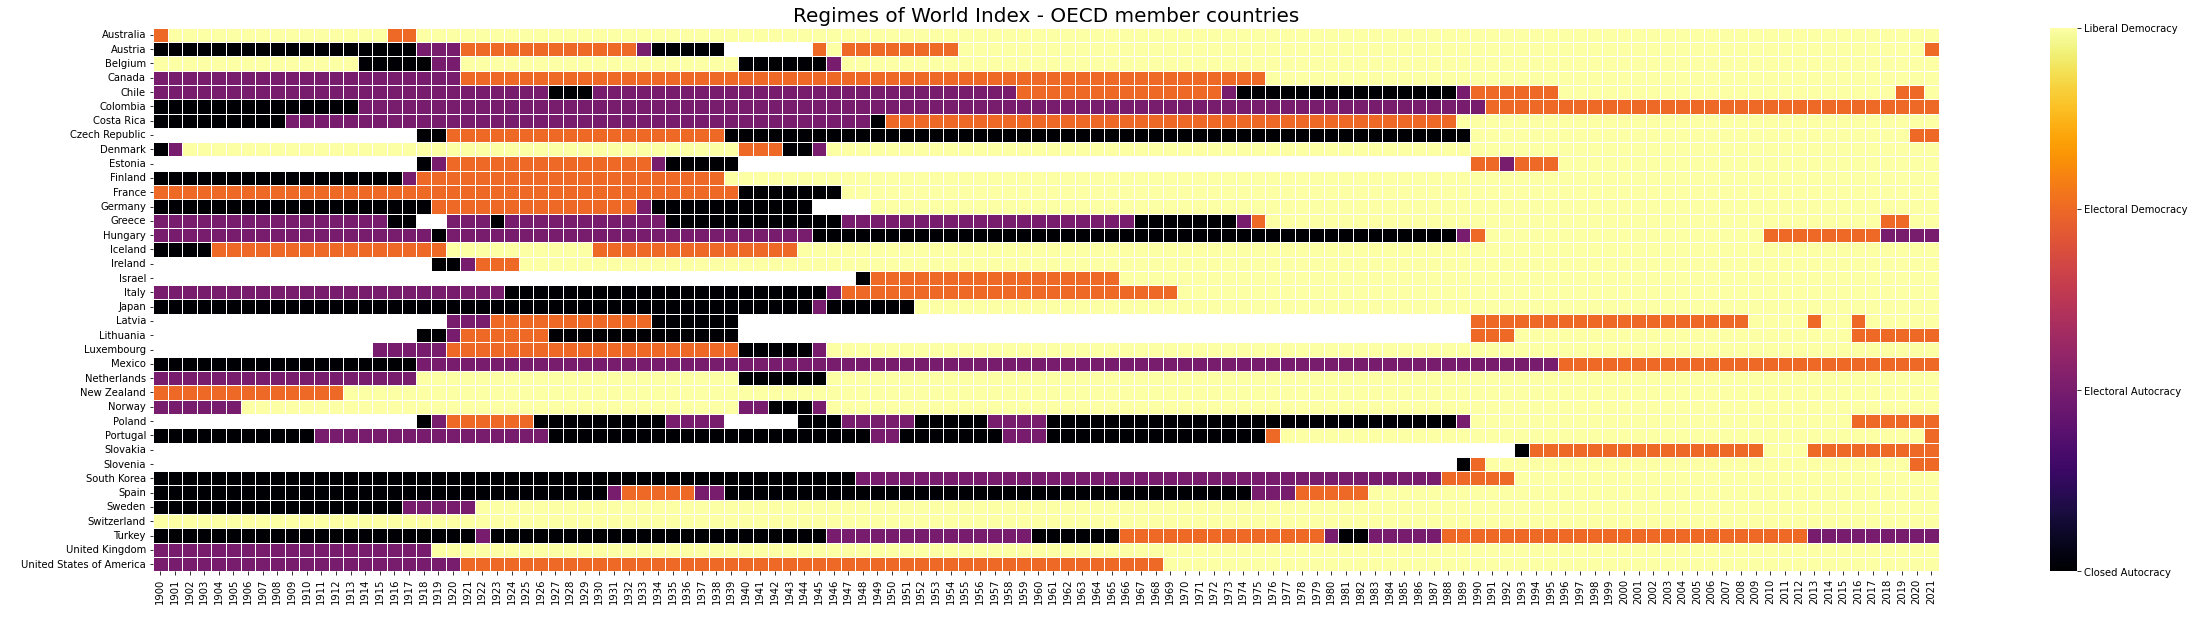

In [28]:
df_oecd_p = df_oecd.pivot('country_name', 'year', 'v2x_regime')
fig3, ax = plt.subplots(figsize=(40,10))
ax = sns.heatmap(df_oecd_p, linewidths=.5, cmap='inferno')
plt.title("Regimes of World Index - OECD member countries", fontsize = 20)
plt.xlabel(' ')
plt.ylabel(' ')

colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.0, 1.0, 2.0, 3.0])
colorbar.set_ticklabels(["Closed Autocracy",
                         "Electoral Autocracy",
                         "Electoral Democracy", 
                         "Liberal Democracy"])

plt.show()

#### Which were the 10 OECD member countries with the lowest Regimes of the World Index in 2021?

In [29]:
df_oecd_b = df_oecd.loc[df_oecd['year'].isin([2021])]
df_oecd_b = df_oecd_b.sort_values(by='v2x_regime')
df_oecd_b = df_oecd_b.reset_index(drop=True)
df_oecd_b

country_name  year  v2x_regime
0                    Hungary  2021         1.0
1                     Turkey  2021         1.0
2                   Slovakia  2021         2.0
3                  Lithuania  2021         2.0
4             Czech Republic  2021         2.0
5                    Austria  2021         2.0
6                   Slovenia  2021         2.0
7                     Mexico  2021         2.0
8                   Colombia  2021         2.0
9                     Poland  2021         2.0
10                  Portugal  2021         2.0
11                    Sweden  2021         3.0
12                    Norway  2021         3.0
13               New Zealand  2021         3.0
14                Luxembourg  2021         3.0
15               Switzerland  2021         3.0
16                    Israel  2021         3.0
17                   Iceland  2021         3.0
18                    Greece  2021         3.0
19                   Finland  2021         3.0
20                   Estonia  2021         3.0
21                   Denmark  2021         3.0
22                     Japan  2021         3.0
23               South Korea  2021         3.0
24            United Kingdom  2021         3.0
25                     Spain  2021         3.0
26  United States of America  2021         3.0
27                    Latvia  2021         3.0
28                     Italy  2021         3.0
29                   Ireland  2021         3.0
30                   Germany  2021         3.0
31                    France  2021         3.0
32                Costa Rica  2021         3.0
33                     Chile  2021         3.0
34                 Australia  2021         3.0
35                    Canada  2021         3.0
36                   Belgium  2021         3.0
37               Netherlands  2021         3.0

In [30]:
print(df_oecd_b.loc[0,'country_name'] + " and " +  df_oecd_b.loc[1,'country_name'])

Hungary and Turkey


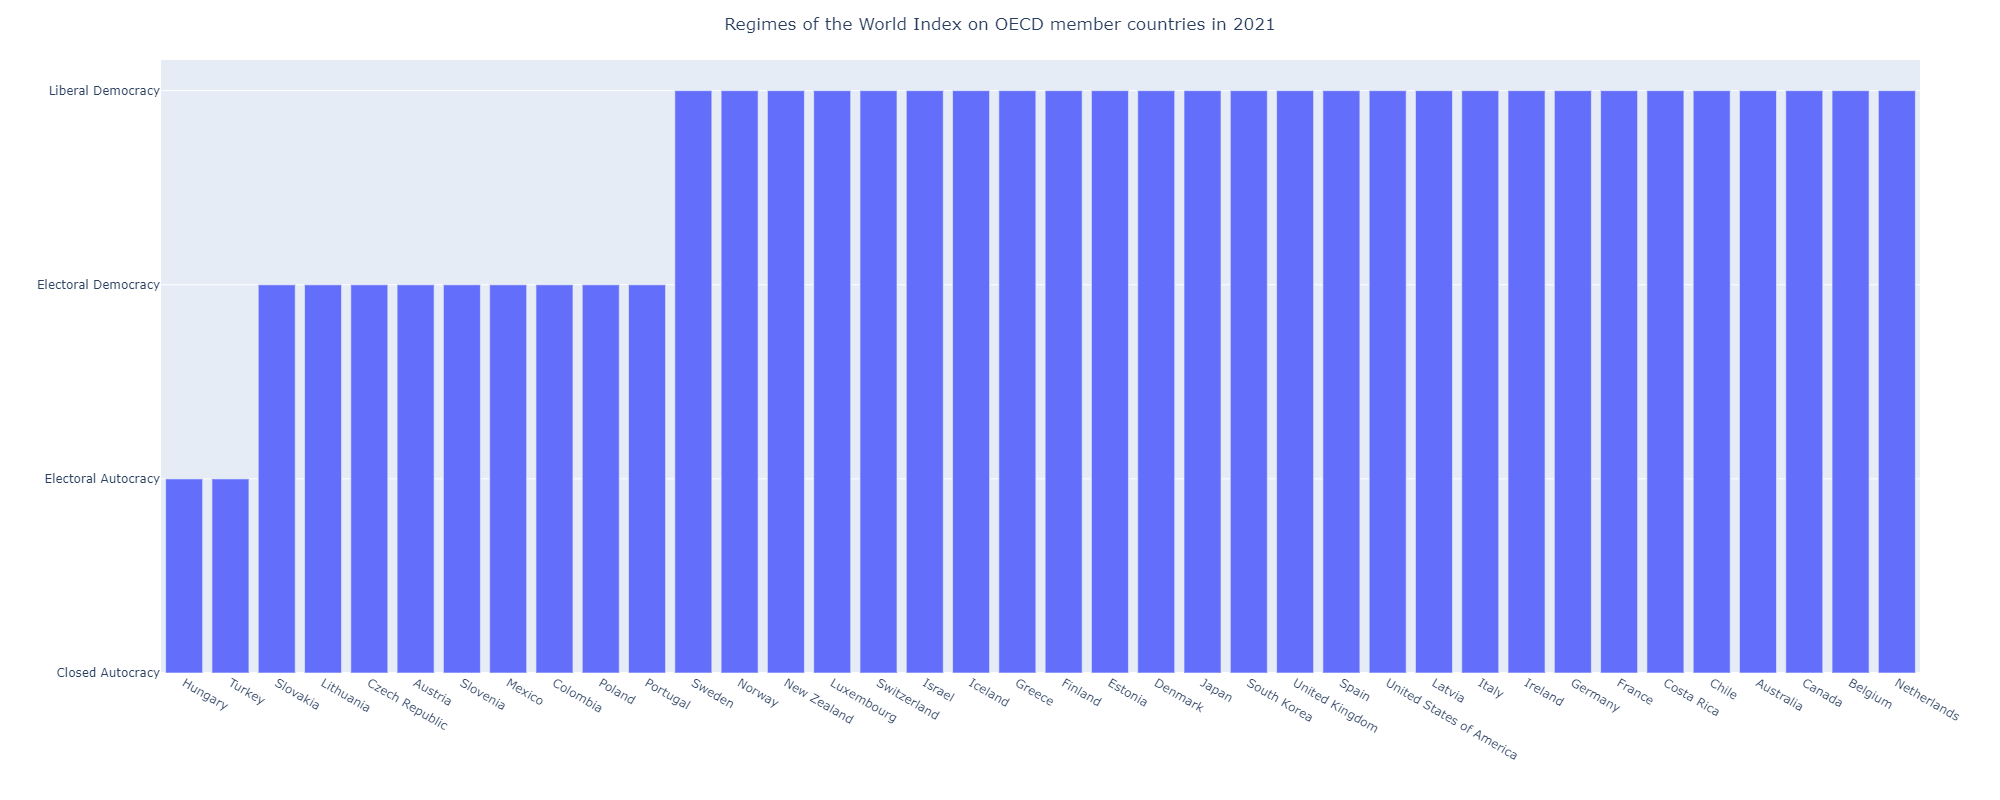

In [31]:
fig4 = px.bar(df_oecd_b, x='country_name', y='v2x_regime', 
              labels={"country_name": " ",  "v2x_regime": " "})

fig4.update_layout(autosize=False, width=2000, height=800, 
                   title="Regimes of the World Index on OECD member countries in 2021", 
                   title_x=0.5,
                   yaxis=dict(tickvals=[0,1,2,3], 
                              ticktext=["Closed Autocracy",
                                        "Electoral Autocracy",
                                        "Electoral Democracy", 
                                        "Liberal Democracy"]))

fig4.show()

#### What was the average Regimes of the World Index in OECD member countries in 2021?

In [32]:
print("The average Regimes of the World Index in OECD member countries in 2021 was " + str(df_oecd_b['v2x_regime'].mean().round(2)))

The average Regimes of the World Index in OECD member countries in 2021 was 2.66


#### What is the behavior between GDP per capita and the Regimes of the World Index in OECD member countries over time?

In [33]:
df_oecd_gdp = df[['country_name', 'year', 'v2x_regime', 'e_gdppc', 'e_regiongeo', 'e_wb_pop']]
df_oecd_gdp = df_oecd_gdp.dropna(axis='rows', how='any')
df_oecd_gdp = df_oecd_gdp.loc[df_oecd_gdp['country_name'].isin(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia', 
                                                                'Costa Rica', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 
                                                                'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 
                                                                'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 
                                                                'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 
                                                                'Portugal', 'Slovakia', 'Slovenia', 'South Korea', 'Spain', 
                                                                'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States of America'])]

df_oecd_gdp['e_regiongeo'] = df_oecd_gdp.loc[:, 'e_regiongeo'].replace({1: 'Western Europe', 2: 'Northern Europe', 3: 'Southern Europe', 4: 'Eastern Europe', 5: 'Northern Africa', 
                                                                        6: 'Western Africa', 7: 'Middle Africa', 8: 'Eastern Africa', 9: 'Southern Africa', 10: 'Western Asia', 
                                                                        11: 'Central Asia', 12: 'Eastern Asia', 13: 'South-Eastern Asia', 14: 'Southern Asia', 15: 'Oceania',
                                                                        16: 'North America', 17: 'Central America', 18: 'South America', 19: 'Caribbean'})

df_oecd_gdp.head(10)

country_name  year  v2x_regime  e_gdppc      e_regiongeo    e_wb_pop
171       Mexico  1960         1.0    5.389  Central America  37771861.0
172       Mexico  1961         1.0    5.526  Central America  38966049.0
173       Mexico  1962         1.0    5.680  Central America  40195318.0
174       Mexico  1963         1.0    5.920  Central America  41462373.0
175       Mexico  1964         1.0    6.328  Central America  42771077.0
176       Mexico  1965         1.0    6.615  Central America  44123863.0
177       Mexico  1966         1.0    6.839  Central America  45519746.0
178       Mexico  1967         1.0    7.136  Central America  46956208.0
179       Mexico  1968         1.0    7.449  Central America  48431971.0
180       Mexico  1969         1.0    7.656  Central America  49945278.0

In [34]:
df_oecd_gdp_69 = df_oecd_gdp.loc[df_oecd_gdp['year'].isin([1969])]
df_oecd_gdp_69.head(10)

country_name  year  v2x_regime  e_gdppc      e_regiongeo  \
180                     Mexico  1969         1.0    7.656  Central America   
535                     Sweden  1969         3.0   20.739  Northern Europe   
759                Switzerland  1969         3.0   26.424   Western Europe   
1234                     Japan  1969         3.0   13.626     Eastern Asia   
2442                  Colombia  1969         1.0    4.723    South America   
2609                    Poland  1969         0.0    6.840   Eastern Europe   
3075  United States of America  1969         3.0   27.337    North America   
3308                  Portugal  1969         0.0    8.161  Southern Europe   
6544               South Korea  1969         1.0    2.496     Eastern Asia   
9800                    Canada  1969         2.0   20.633    North America   

         e_wb_pop  
180    49945278.0  
535     7968072.0  
759     6136387.0  
1234  102219000.0  
2442   20942453.0  
2609   32548300.0  
3075  202677000.0  
3308    8757705.0  
6544   31544266.0  
9800   21028000.0

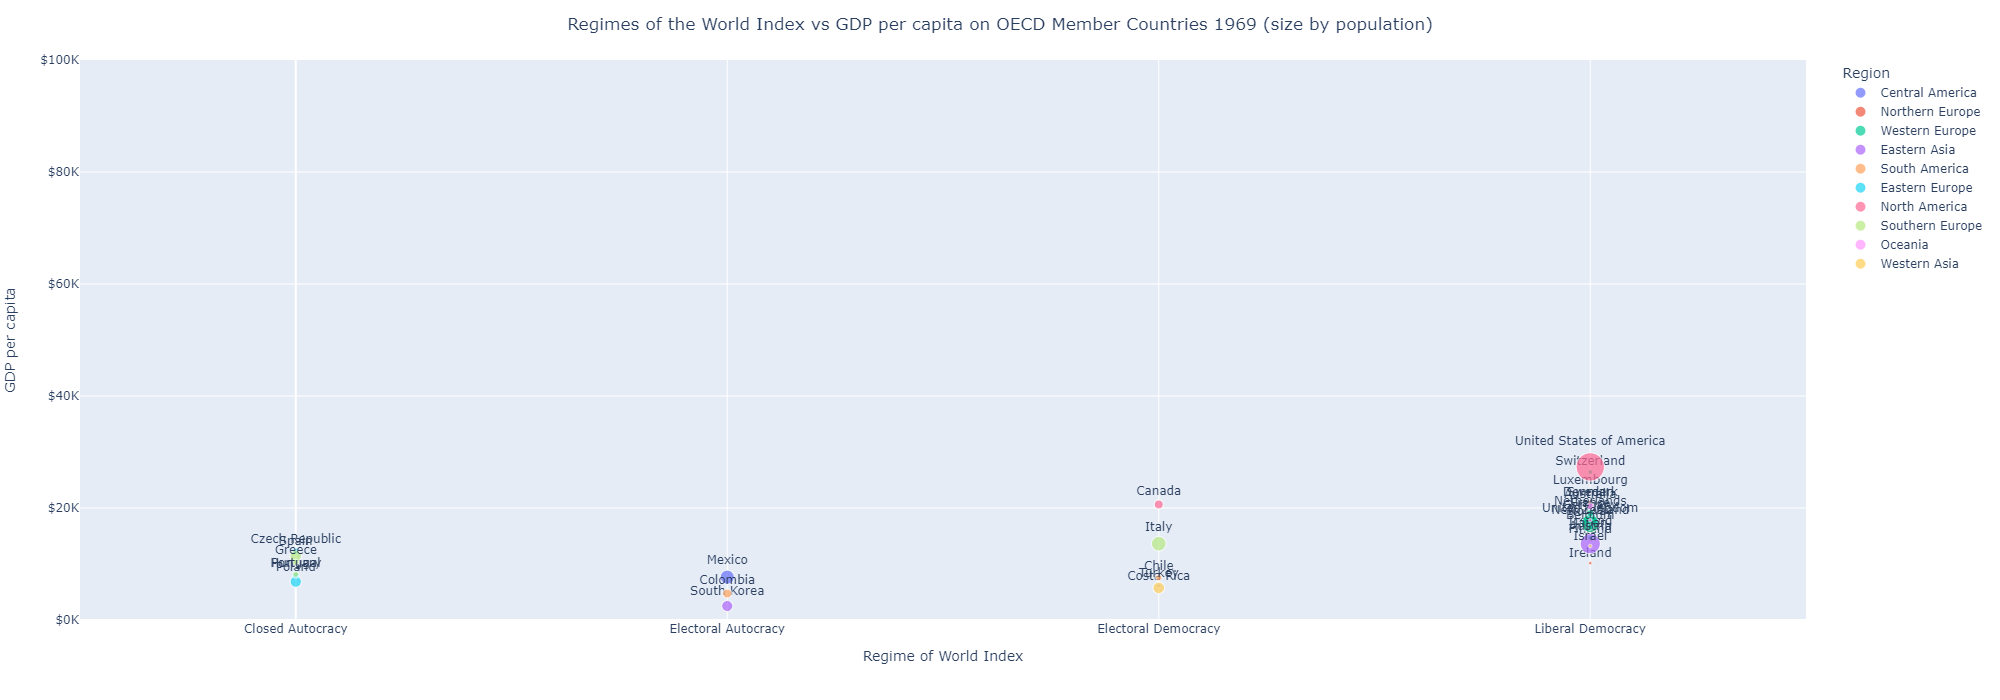

In [36]:
fig5a = px.scatter(df_oecd_gdp_69, x='v2x_regime', y='e_gdppc', 
                    size='e_wb_pop', color='e_regiongeo', 
                    hover_name='country_name', text='country_name',
                    labels={"e_gdppc": "GDP per capita",  
                            "v2x_regime": "Regime of World Index", 
                            "e_regiongeo": "Region", 
                            "e_wb_pop": "Population", 
                            "country_name": "Country", 
                            "year": "Year"})

fig5a.update_layout(autosize=False, 
                     width=2000, height=700, 
                     title="Regimes of the World Index vs GDP per capita on OECD Member Countries 1969 (size by population)", 
                     title_x=0.5,
                     xaxis_range=(-0.5, 3.5),
                     yaxis_range=(0, 100))

fig5a.update_traces(textposition="top center")

fig5a.update_xaxes(tick0=0, dtick=1,
                    ticktext=["Closed Autocracy",
                              "Electoral Autocracy",
                              "Electoral Democracy", 
                              "Liberal Democracy"],
                    tickvals=[0, 1, 2, 3])

fig5a.update_yaxes(tickprefix="$", ticksuffix="K")

fig5a.show()

As of 1996 all OECD member countries were democratic countries with Colombia having the lowest GDP per capita at 8,800 dollars and Luxembourg with the highest GDP per capita at 55,000 dollars.

However, by 2013 Turkey regressed in the regime index to an electoral autocracy.

By 2018 Hungary moved back to an electoral autocracy, adding two countries to this index along with Turkey, both with GDP per capita of 25,000 and 23,000 dollars respectively. [Fariss et al. (2021)](#bibli)

Between the years 1960 and 1995 Mexico remained in the electoral autocracy index, subsequently, from the year 1996 to 2019 Mexico moved up in the ranking to an electoral democracy with a steadily increasing GDP per capita except in the years 2009 and 2019 where it declined. 

In [37]:
df_oecd_gdp_19 = df_oecd_gdp.loc[df_oecd_gdp['year'].isin([2019])]
df_oecd_gdp_19.head(10)

country_name  year  v2x_regime  e_gdppc      e_regiongeo  \
230                     Mexico  2019         2.0   16.814  Central America   
585                     Sweden  2019         3.0   48.804  Northern Europe   
809                Switzerland  2019         3.0   56.110   Western Europe   
1284                     Japan  2019         3.0   39.060     Eastern Asia   
2492                  Colombia  2019         2.0   13.656    South America   
2659                    Poland  2019         2.0   27.280   Eastern Europe   
3125  United States of America  2019         3.0   60.641    North America   
3358                  Portugal  2019         3.0   28.813  Southern Europe   
6594               South Korea  2019         3.0   40.987     Eastern Asia   
9850                    Canada  2019         3.0   46.849    North America   

         e_wb_pop  
230   127575529.0  
585    10278887.0  
809     8575280.0  
1284  126264931.0  
2492   50339443.0  
2659   37965475.0  
3125  328329953.0  
3358   10286263.0  
6594   51709098.0  
9850   37593384.0

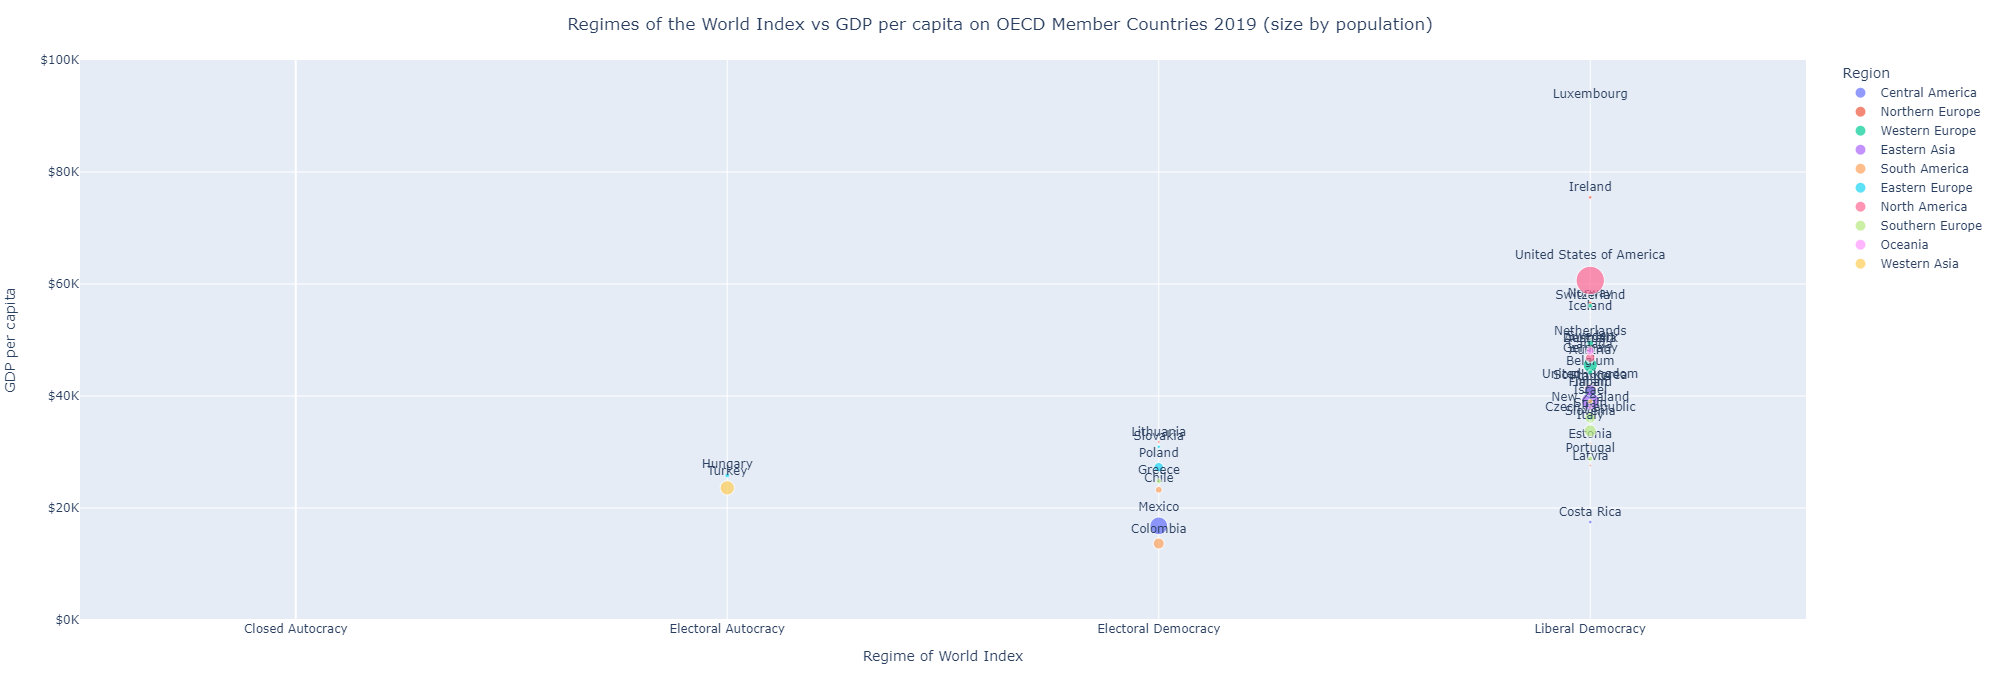

In [38]:
fig5_1 = px.scatter(df_oecd_gdp_19, x='v2x_regime', y='e_gdppc', 
                    size='e_wb_pop', color='e_regiongeo', 
                    hover_name='country_name', text='country_name',
                    labels={"e_gdppc": "GDP per capita",  
                            "v2x_regime": "Regime of World Index", 
                            "e_regiongeo": "Region", 
                            "e_wb_pop": "Population", 
                            "country_name": "Country", 
                            "year": "Year"})

fig5_1.update_layout(autosize=False, 
                     width=2000, height=700, 
                     title="Regimes of the World Index vs GDP per capita on OECD Member Countries 2019 (size by population)", 
                     title_x=0.5,
                     xaxis_range=(-0.5, 3.5),
                     yaxis_range=(0, 100))

fig5_1.update_traces(textposition="top center")

fig5_1.update_xaxes(tick0=0, dtick=1,
                    ticktext=["Closed Autocracy",
                              "Electoral Autocracy",
                              "Electoral Democracy", 
                              "Liberal Democracy"],
                    tickvals=[0, 1, 2, 3])

fig5_1.update_yaxes(tickprefix="$", ticksuffix="K")

fig5_1.show()

#### What was the correlation between GDP per capita and the Regimes of the World Index in 2019 over OECD member countries?

In [39]:
pearson_coef, p_value = stats.pearsonr(df_oecd_gdp['e_gdppc'], df_oecd_gdp['v2x_regime'])
print("The Pearson Correlation Coefficient is", pearson_coef,"with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5243747724507009 with a P-value of P = 1.1940755502858084e-150


Since the p-value is < 0.05, the correlation between GDP per capita and Regimes of the World Index which means that it is statistically moderately significant, although the linear relationship isn't extremely strong (~0.52).

## Mexico

The period of analysis begins in 1988, when the president continued with the stage called neoliberalism initiated in 1982, implementing structural changes due to globalization. [Salazar. (2004)](#bibli)

One of these changes was of great relevance in electoral matters since the Federal Electoral Institute was created in 1990, which was in charge of the executive power.

As of 1996 the Federal Electoral Institute became independent from the executive power being a citizen arbitration in the elections. [Instituo Nacional Electoral. (n.d.)](#bibli)

This was one of the main factors that allowed the transition from Electoral Autocracy to Electoral Democracy in 1996 in Mexico as shown in the graph above.

### Mexico Executive Power

In [40]:
df_m = df[['country_name', 'year', 'v2exnamhos', 'v2exparhos', 'v2exrescon_osp', 'v2exbribe_osp', 'v2exembez_osp']]
df_m = df_m.loc[df_m['country_name'].isin(['Mexico'])]
df_m = df_m[-34:]
df_m = df_m[['year', 'v2exnamhos', 'v2exparhos', 'v2exrescon_osp', 'v2exbribe_osp', 'v2exembez_osp']]
df_m = df_m.reset_index(drop=True)
df_m.head(10)

year                     v2exnamhos                         v2exparhos  \
0  1988      Carlos Salinas de Gortari  Institutional Revolutionary Party   
1  1989      Carlos Salinas de Gortari  Institutional Revolutionary Party   
2  1990      Carlos Salinas de Gortari  Institutional Revolutionary Party   
3  1991      Carlos Salinas de Gortari  Institutional Revolutionary Party   
4  1992      Carlos Salinas de Gortari  Institutional Revolutionary Party   
5  1993      Carlos Salinas de Gortari  Institutional Revolutionary Party   
6  1994  Ernesto Zedillo Ponce de León  Institutional Revolutionary Party   
7  1995  Ernesto Zedillo Ponce de León  Institutional Revolutionary Party   
8  1996  Ernesto Zedillo Ponce de León  Institutional Revolutionary Party   
9  1997  Ernesto Zedillo Ponce de León  Institutional Revolutionary Party   

   v2exrescon_osp  v2exbribe_osp  v2exembez_osp  
0           2.418          0.554          1.850  
1           2.418          0.554          1.850  
2           2.418          0.554          1.850  
3           2.418          0.554          1.850  
4           2.418          0.554          1.850  
5           2.418          0.554          1.850  
6           2.464          1.306          2.531  
7           2.607          1.306          2.531  
8           2.607          1.306          2.531  
9           2.607          1.306          2.531

#### v2exnamhos: Head of State. [Coppedge et al. (2022b)](#bibli)

#### Which were the presidents of Mexico in the table above?

In [41]:
df_m.v2exnamhos.unique()

array(['Carlos Salinas de Gortari', 'Ernesto Zedillo Ponce de León',
       'Vicente Fox Quesada', 'Felipe de Jesús Calderón Hinojosa',
       'Enrique Peña Nieto', 'Andrés Manuel López Obrador'], dtype=object)

#### v2exparhos: Head of State Party Affiliation. [Coppedge et al. (2022b)](#bibli)

#### To which political parties were the presidents of Mexico affiliated in the table above?

In [42]:
df_m.groupby(['v2exnamhos', 'v2exparhos'])['year'].count()

v2exnamhos                         v2exparhos                       
Andrés Manuel López Obrador        National Regeneration Movement       4
Carlos Salinas de Gortari          Institutional Revolutionary Party    6
Enrique Peña Nieto                 Institutional Revolutionary Party    6
Ernesto Zedillo Ponce de León      Institutional Revolutionary Party    6
Felipe de Jesús Calderón Hinojosa  National Action Party                6
Vicente Fox Quesada                National Action Party                6
Name: year, dtype: int64

#### v2exrescon_osp: Executive respects constitution. [Pemstein et al. (2022)](#bibli) 

Question: Do members of the executive (the head of state, the head of government, and cabinet ministers) respect the constitution?

Responses:

0: Members of the executive violate the constitution whenever they want to, without legal consequences.

1: Members of the executive violate most provisions of the constitution without legal consequences, but still must respect certain provisions.

2: Members of the executive would face legal consequences for violating most provisions of the constitution, but can disregard some provisions without any legal consequences.

3: Members of the executive rarely violate the constitution, and when it happens they face legal charges.

4: Members of the executive never violate the constitution.

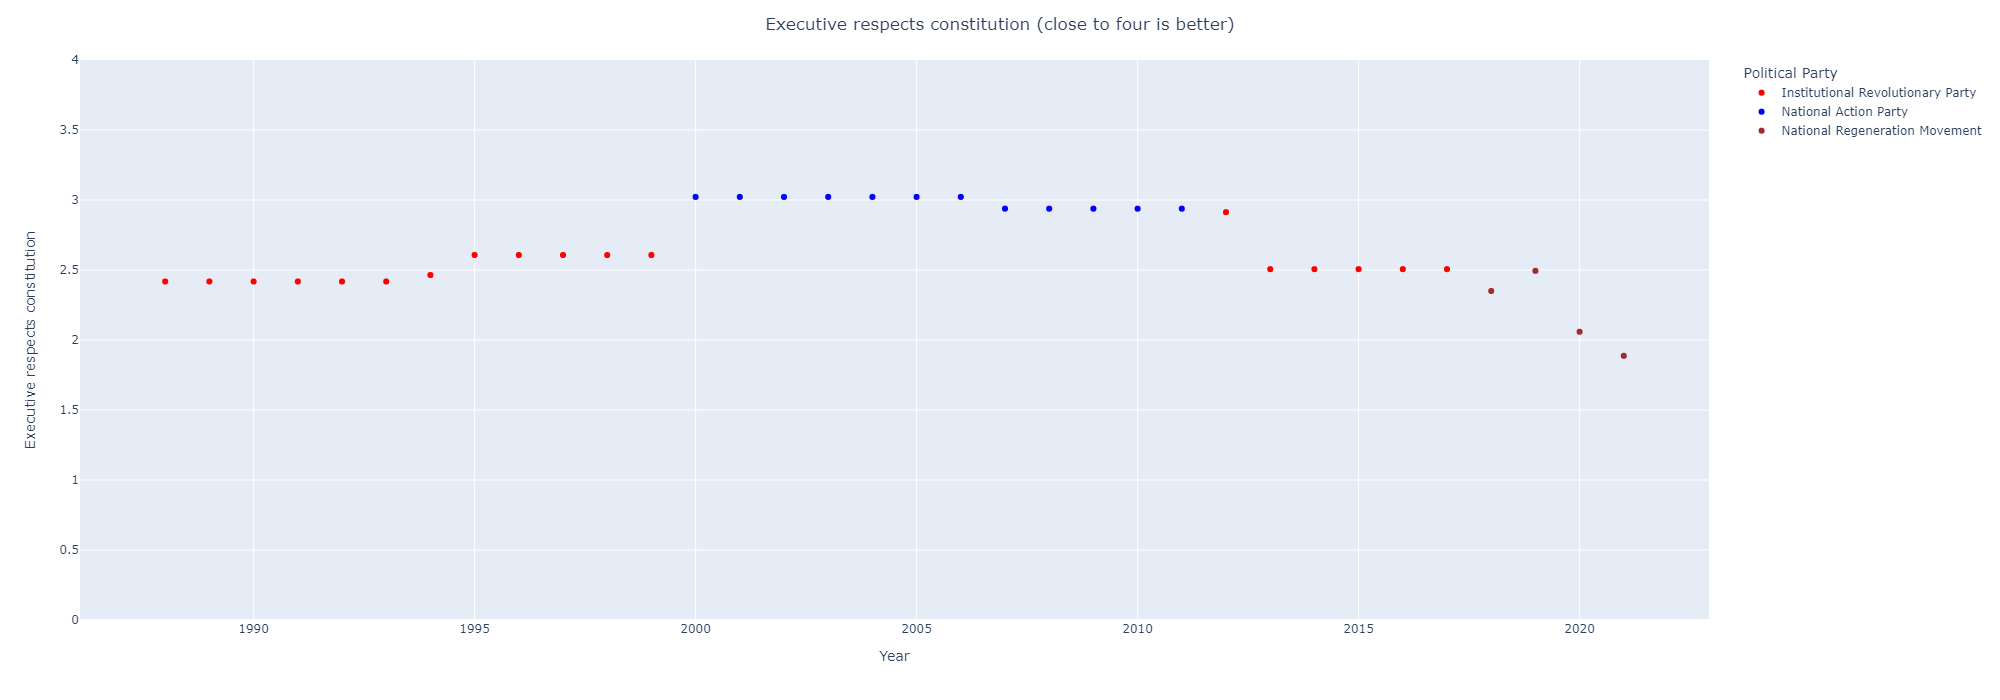

In [43]:
fig6 = px.scatter(df_m, x='year', y='v2exrescon_osp', 
                  color='v2exparhos', hover_name='v2exnamhos',
                  color_discrete_sequence=["red", "blue", "brown"],
                  labels={"year": "Year", 
                          "v2exrescon_osp": "Executive respects constitution", 
                          "v2exparhos": "Political Party"})

fig6.update_layout(autosize=False, 
                   width=2000, height=700, 
                   title="Executive respects constitution (close to four is better)", 
                   title_x=0.5,
                   yaxis_range=(0, 4))

fig6.show()

Between 2000 and 2011 the executive has given greater respect to the constitution.

Between 2018 and 2021 the executive has given less respect to the constitution.

#### v2exbribe_osp: Executive bribery and corrupt exchanges. [Pemstein et al. (2022)](#bibli)

Question: How routinely do members of the executive (the head of state, the head of government, and cabinet ministers), or their agents, grant favors in exchange for bribes, kickbacks, or other material inducements?

Responses:

0: It is routine and expected.

1: It happens more often than not in dealings with the executive.

2: It happens but is unpredictable: those dealing with the executive find it hard to predict when an inducement will be necessary.

3: It happens occasionally but is not expected.

4: It never, or hardly ever, happens.



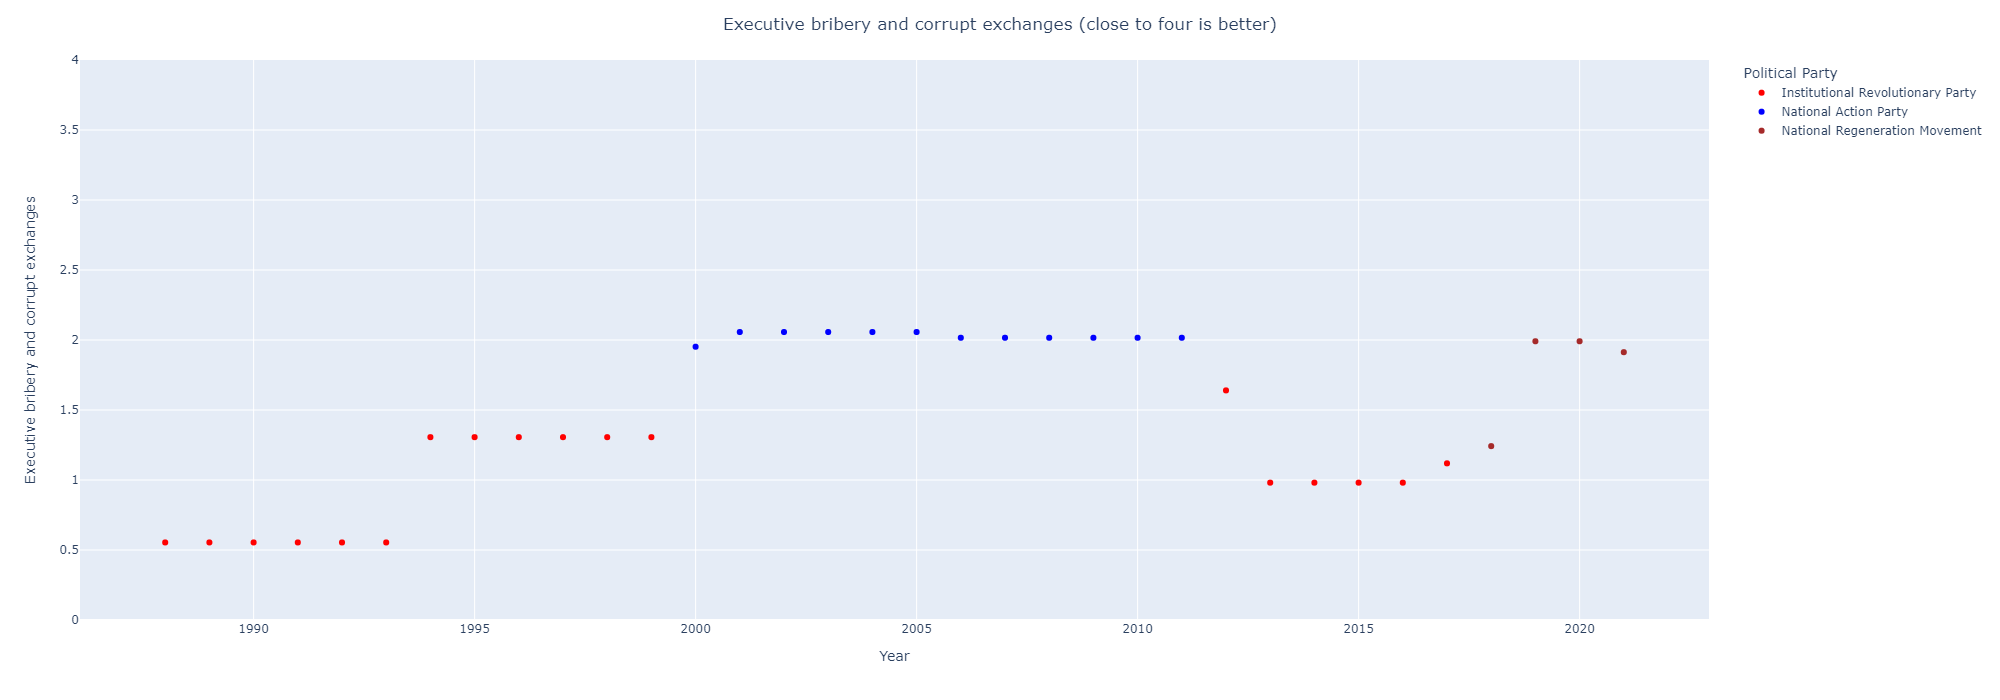

In [44]:
fig7 = px.scatter(df_m, x='year', y='v2exbribe_osp', 
                  color='v2exparhos', hover_name='v2exnamhos',
                  color_discrete_sequence=["red", "blue", "brown"],
                  labels={"year": "Year", 
                          "v2exbribe_osp": "Executive bribery and corrupt exchanges", 
                          "v2exparhos": "Political Party"})

fig7.update_layout(autosize=False, 
                   width=2000, height=700, 
                   title="Executive bribery and corrupt exchanges (close to four is better)", 
                   title_x=0.5,
                   yaxis_range=(0, 4))

fig7.show()

Both between 2000 and 2011 and between 2019 and 2020 executive bribes and corrupt exchanges were lower than in the other periods.

#### v2exembez_op: Executive embezzlement and theft. [Pemstein et al. (2022)](#bibli)

Question: How often do members of the executive (the head of state, the head of government, and cabinet ministers), or their agents, steal, embezzle, or misappropriate public funds or other state resources for personal or family use?

Responses:

0: Constantly. Members of the executive act as though all public resources were their personal or family property.

1: Often. Members of the executive are responsible stewards of selected public resources but treat the rest like personal property.

2: About half the time. Members of the executive are about as likely to be responsible stewards of selected public resources as they are to treat them like personal property.

3: Occasionally. Members of the executive are responsible stewards of most public resources but treat selected others like personal property.

4: Never, or hardly ever. Members of the executive are almost always responsible stewards of public resources and keep them separate from personal or family property

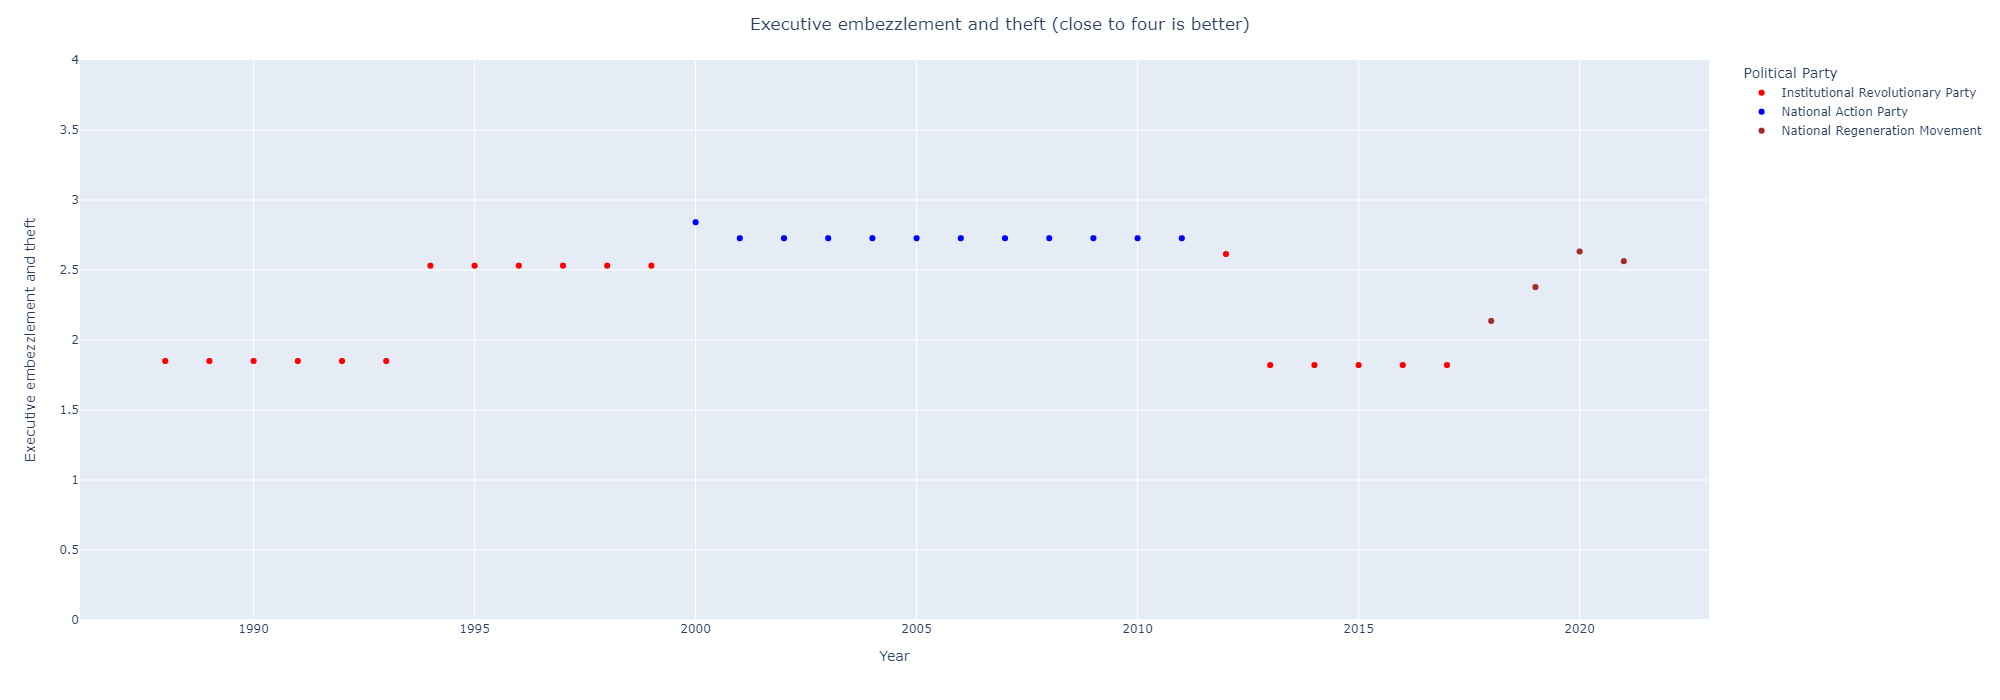

In [45]:
fig8 = px.scatter(df_m, x='year', y='v2exembez_osp', 
                  color='v2exparhos', hover_name='v2exnamhos',
                  color_discrete_sequence=["red", "blue", "brown"],
                  labels={"year": "Year", 
                          "v2exembez_osp": "Executive embezzlement and theft", 
                          "v2exparhos": "Political Party"})

fig8.update_layout(autosize=False, 
                   width=2000, height=700, 
                   title="Executive embezzlement and theft (close to four is better)", 
                   title_x=0.5,
                   yaxis_range=(0, 4))

fig8.show()

Between 2000 and 2011 executive embezzlement and theft were lower than in the other periods.

### Mexico Legislative Power

In Mexico, the legislative power is divided into the upper and lower houses. 

For this analysis, the data used are only for the lower house, since they are the only ones available in the database.

#### v2lgcrrpt: Legislature corrupt activities. [Pemstein et al. (2022)](#bibli)
Question: Do members of the legislature abuse their position for financial gain?

Clarification: This includes any of the following: (a) accepting bribes, (b) helping to obtain government contracts for firms that the legislator (or his/her family/friends/political supporters) own, (c) doing favors for firms in exchange for the opportunity of employment after leaving the legislature, (d) stealing money from the state or from campaign donations for personal use.

Responses:

0: Commonly. Most legislators probably engage in these activities.

1: Often. Many legislators probably engage in these activities.

2: Sometimes. Some legislators probably engage in these activities.

3: Very occasionally. There may be a few legislators who engage in these activities but the vast majority do not.

4: Never, or hardly ever.

#### v2lpname: Name of largest party in the lower chamber.
#### v2slpname: Name of second largest party in the lower chamber. 
#### v2tlpname: Name of third largest party in the lower chamber.
#### v2ellostsl: Lower chamber election seat share won by largest party (percentaje).
#### v2ellostss: Lower chamber election seat share won by second largest party (percentaje).
#### v2ellostts: Lower chamber election seat share won by third largest party (percentaje). [Coppedge et al. (2022b)](#bibli)

In [46]:
df_m_l1 = df[['country_name', 'year', 'v2lgcrrpt_osp', 'v2lpname', 'v2ellostsl', 'v2slpname', 'v2ellostss', 'v2tlpname', 'v2ellostts']]
df_m_l1 = df_m_l1.loc[df_m_l1['country_name'].isin(['Mexico'])]
df_m_l1 = df_m_l1[-34:]
df_m_l1 = df_m_l1[['year', 'v2lgcrrpt_osp', 'v2lpname', 'v2ellostsl', 'v2slpname', 'v2ellostss', 'v2tlpname', 'v2ellostts']]
df_m_l1 = df_m_l1.reset_index(drop=True)
df_m_l1

year  v2lgcrrpt_osp                           v2lpname  v2ellostsl  \
0   1988          0.451  Institutional Revolutionary Party        52.0   
1   1989          0.613                                NaN         NaN   
2   1990          0.613                                NaN         NaN   
3   1991          0.613  Institutional Revolutionary Party        64.0   
4   1992          0.613                                NaN         NaN   
5   1993          0.613                                NaN         NaN   
6   1994          0.977  Institutional Revolutionary Party        60.0   
7   1995          0.977                                NaN         NaN   
8   1996          0.977                                NaN         NaN   
9   1997          0.977  Institutional Revolutionary Party        47.8   
10  1998          1.033                                NaN         NaN   
11  1999          1.033                                NaN         NaN   
12  2000          1.458              National Action Party        41.6   
13  2001          1.458                                NaN         NaN   
14  2002          1.233                                NaN         NaN   
15  2003          1.233  Institutional Revolutionary Party        44.8   
16  2004          1.233                                NaN         NaN   
17  2005          1.233                                NaN         NaN   
18  2006          1.233              National Action Party        41.2   
19  2007          1.233                                NaN         NaN   
20  2008          1.233                                NaN         NaN   
21  2009          1.233  Institutional Revolutionary Party        47.4   
22  2010          1.111                                NaN         NaN   
23  2011          1.111                                NaN         NaN   
24  2012          1.022  Institutional Revolutionary Party        42.4   
25  2013          0.933                                NaN         NaN   
26  2014          0.933                                NaN         NaN   
27  2015          0.956  Institutional Revolutionary Party        40.6   
28  2016          0.956                                NaN         NaN   
29  2017          0.956                                NaN         NaN   
30  2018          1.118     National Regeneration Movement        51.0   
31  2019          1.118                                NaN         NaN   
32  2020          1.118                                NaN         NaN   
33  2021          1.346                                NaN        39.6   

                             v2slpname  v2ellostss  \
0            National Democratic Front        20.2   
1                                  NaN         NaN   
2                                  NaN         NaN   
3                National Action Party        17.8   
4                                  NaN         NaN   
5                                  NaN         NaN   
6                National Action Party        23.8   
7                                  NaN         NaN   
8                                  NaN         NaN   
9   Party of the Democratic Revolution        24.2   
10                                 NaN         NaN   
11                                 NaN         NaN   
12   Institutional Revolutionary Party        41.4   
13                                 NaN         NaN   
14                                 NaN         NaN   
15               National Action Party        30.2   
16                                 NaN         NaN   
17                                 NaN         NaN   
18  Party of the Democratic Revolution        25.2   
19                                 NaN         NaN   
20                                 NaN         NaN   
21               National Action Party        28.6   
22                                 NaN         NaN   
23                                 NaN         NaN   
24               National Action Party        22.8   
25       

Every three years the positions in the lower chamber are renewed

Missing information for the year 2021 on the lower house is added. [Cámara de Diputados. (2022)](#bibli)

In [47]:
df_m_l1.loc[33:,'v2lpname'] = "National Regeneration Movement"
df_m_l1.loc[33:,'v2slpname'] = "National Action Party"
df_m_l1.loc[33:,'v2tlpname'] = "Institutional Revolutionary Party"
df_m_l1

year  v2lgcrrpt_osp                           v2lpname  v2ellostsl  \
0   1988          0.451  Institutional Revolutionary Party        52.0   
1   1989          0.613                                NaN         NaN   
2   1990          0.613                                NaN         NaN   
3   1991          0.613  Institutional Revolutionary Party        64.0   
4   1992          0.613                                NaN         NaN   
5   1993          0.613                                NaN         NaN   
6   1994          0.977  Institutional Revolutionary Party        60.0   
7   1995          0.977                                NaN         NaN   
8   1996          0.977                                NaN         NaN   
9   1997          0.977  Institutional Revolutionary Party        47.8   
10  1998          1.033                                NaN         NaN   
11  1999          1.033                                NaN         NaN   
12  2000          1.458              National Action Party        41.6   
13  2001          1.458                                NaN         NaN   
14  2002          1.233                                NaN         NaN   
15  2003          1.233  Institutional Revolutionary Party        44.8   
16  2004          1.233                                NaN         NaN   
17  2005          1.233                                NaN         NaN   
18  2006          1.233              National Action Party        41.2   
19  2007          1.233                                NaN         NaN   
20  2008          1.233                                NaN         NaN   
21  2009          1.233  Institutional Revolutionary Party        47.4   
22  2010          1.111                                NaN         NaN   
23  2011          1.111                                NaN         NaN   
24  2012          1.022  Institutional Revolutionary Party        42.4   
25  2013          0.933                                NaN         NaN   
26  2014          0.933                                NaN         NaN   
27  2015          0.956  Institutional Revolutionary Party        40.6   
28  2016          0.956                                NaN         NaN   
29  2017          0.956                                NaN         NaN   
30  2018          1.118     National Regeneration Movement        51.0   
31  2019          1.118                                NaN         NaN   
32  2020          1.118                                NaN         NaN   
33  2021          1.346     National Regeneration Movement        39.6   

                             v2slpname  v2ellostss  \
0            National Democratic Front        20.2   
1                                  NaN         NaN   
2                                  NaN         NaN   
3                National Action Party        17.8   
4                                  NaN         NaN   
5                                  NaN         NaN   
6                National Action Party        23.8   
7                                  NaN         NaN   
8                                  NaN         NaN   
9   Party of the Democratic Revolution        24.2   
10                                 NaN         NaN   
11                                 NaN         NaN   
12   Institutional Revolutionary Party        41.4   
13                                 NaN         NaN   
14                                 NaN         NaN   
15               National Action Party        30.2   
16                                 NaN         NaN   
17                                 NaN         NaN   
18  Party of the Democratic Revolution        25.2   
19                                 NaN         NaN   
20                                 NaN         NaN   
21               National Action Party        28.6   
22                                 NaN         NaN   
23                                 NaN         NaN   
24               National Action Party        22.8   
25       

In [48]:
df_m_l1 = df_m_l1.dropna(axis='rows', how='any')
df_m_l1 = df_m_l1.reset_index(drop=True)
df_m_l1

year  v2lgcrrpt_osp                           v2lpname  v2ellostsl  \
0  1988          0.451  Institutional Revolutionary Party        52.0   
1  1991          0.613  Institutional Revolutionary Party        64.0   
2  1994          0.977  Institutional Revolutionary Party        60.0   
3  1997          0.977  Institutional Revolutionary Party        47.8   
4  2000          1.458              National Action Party        41.6   
5  2009          1.233  Institutional Revolutionary Party        47.4   
6  2012          1.022  Institutional Revolutionary Party        42.4   
7  2015          0.956  Institutional Revolutionary Party        40.6   
8  2018          1.118     National Regeneration Movement        51.0   
9  2021          1.346     National Regeneration Movement        39.6   

                            v2slpname  v2ellostss  \
0           National Democratic Front        20.2   
1               National Action Party        17.8   
2               National Action Party        23.8   
3  Party of the Democratic Revolution        24.2   
4   Institutional Revolutionary Party        41.4   
5               National Action Party        28.6   
6               National Action Party        22.8   
7               National Action Party        21.6   
8               National Action Party        15.8   
9               National Action Party        22.8   

                            v2tlpname  v2ellostts  
0               National Action Party        20.2  
1  Party of the Democratic Revolution         8.2  
2  Party of the Democratic Revolution        14.2  
3               National Action Party        25.0  
4  Party of the Democratic Revolution        13.0  
5  Party of the Democratic Revolution        14.2  
6  Party of the Democratic Revolution        20.8  
7  Party of the Democratic Revolution        11.2  
8                         Labor Party         9.4  
9   Institutional Revolutionary Party        14.0

In [49]:
df_m_l1.sort_values(by='v2lgcrrpt_osp', ascending=False)

year  v2lgcrrpt_osp                           v2lpname  v2ellostsl  \
4  2000          1.458              National Action Party        41.6   
9  2021          1.346     National Regeneration Movement        39.6   
5  2009          1.233  Institutional Revolutionary Party        47.4   
8  2018          1.118     National Regeneration Movement        51.0   
6  2012          1.022  Institutional Revolutionary Party        42.4   
2  1994          0.977  Institutional Revolutionary Party        60.0   
3  1997          0.977  Institutional Revolutionary Party        47.8   
7  2015          0.956  Institutional Revolutionary Party        40.6   
1  1991          0.613  Institutional Revolutionary Party        64.0   
0  1988          0.451  Institutional Revolutionary Party        52.0   

                            v2slpname  v2ellostss  \
4   Institutional Revolutionary Party        41.4   
9               National Action Party        22.8   
5               National Action Party        28.6   
8               National Action Party        15.8   
6               National Action Party        22.8   
2               National Action Party        23.8   
3  Party of the Democratic Revolution        24.2   
7               National Action Party        21.6   
1               National Action Party        17.8   
0           National Democratic Front        20.2   

                            v2tlpname  v2ellostts  
4  Party of the Democratic Revolution        13.0  
9   Institutional Revolutionary Party        14.0  
5  Party of the Democratic Revolution        14.2  
8                         Labor Party         9.4  
6  Party of the Democratic Revolution        20.8  
2  Party of the Democratic Revolution        14.2  
3               National Action Party        25.0  
7  Party of the Democratic Revolution        11.2  
1  Party of the Democratic Revolution         8.2  
0               National Action Party        20.2

In [50]:
df_m_l1.sort_values(by='v2lgcrrpt_osp')

year  v2lgcrrpt_osp                           v2lpname  v2ellostsl  \
0  1988          0.451  Institutional Revolutionary Party        52.0   
1  1991          0.613  Institutional Revolutionary Party        64.0   
7  2015          0.956  Institutional Revolutionary Party        40.6   
2  1994          0.977  Institutional Revolutionary Party        60.0   
3  1997          0.977  Institutional Revolutionary Party        47.8   
6  2012          1.022  Institutional Revolutionary Party        42.4   
8  2018          1.118     National Regeneration Movement        51.0   
5  2009          1.233  Institutional Revolutionary Party        47.4   
9  2021          1.346     National Regeneration Movement        39.6   
4  2000          1.458              National Action Party        41.6   

                            v2slpname  v2ellostss  \
0           National Democratic Front        20.2   
1               National Action Party        17.8   
7               National Action Party        21.6   
2               National Action Party        23.8   
3  Party of the Democratic Revolution        24.2   
6               National Action Party        22.8   
8               National Action Party        15.8   
5               National Action Party        28.6   
9               National Action Party        22.8   
4   Institutional Revolutionary Party        41.4   

                            v2tlpname  v2ellostts  
0               National Action Party        20.2  
1  Party of the Democratic Revolution         8.2  
7  Party of the Democratic Revolution        11.2  
2  Party of the Democratic Revolution        14.2  
3               National Action Party        25.0  
6  Party of the Democratic Revolution        20.8  
8                         Labor Party         9.4  
5  Party of the Democratic Revolution        14.2  
9   Institutional Revolutionary Party        14.0  
4  Party of the Democratic Revolution        13.0

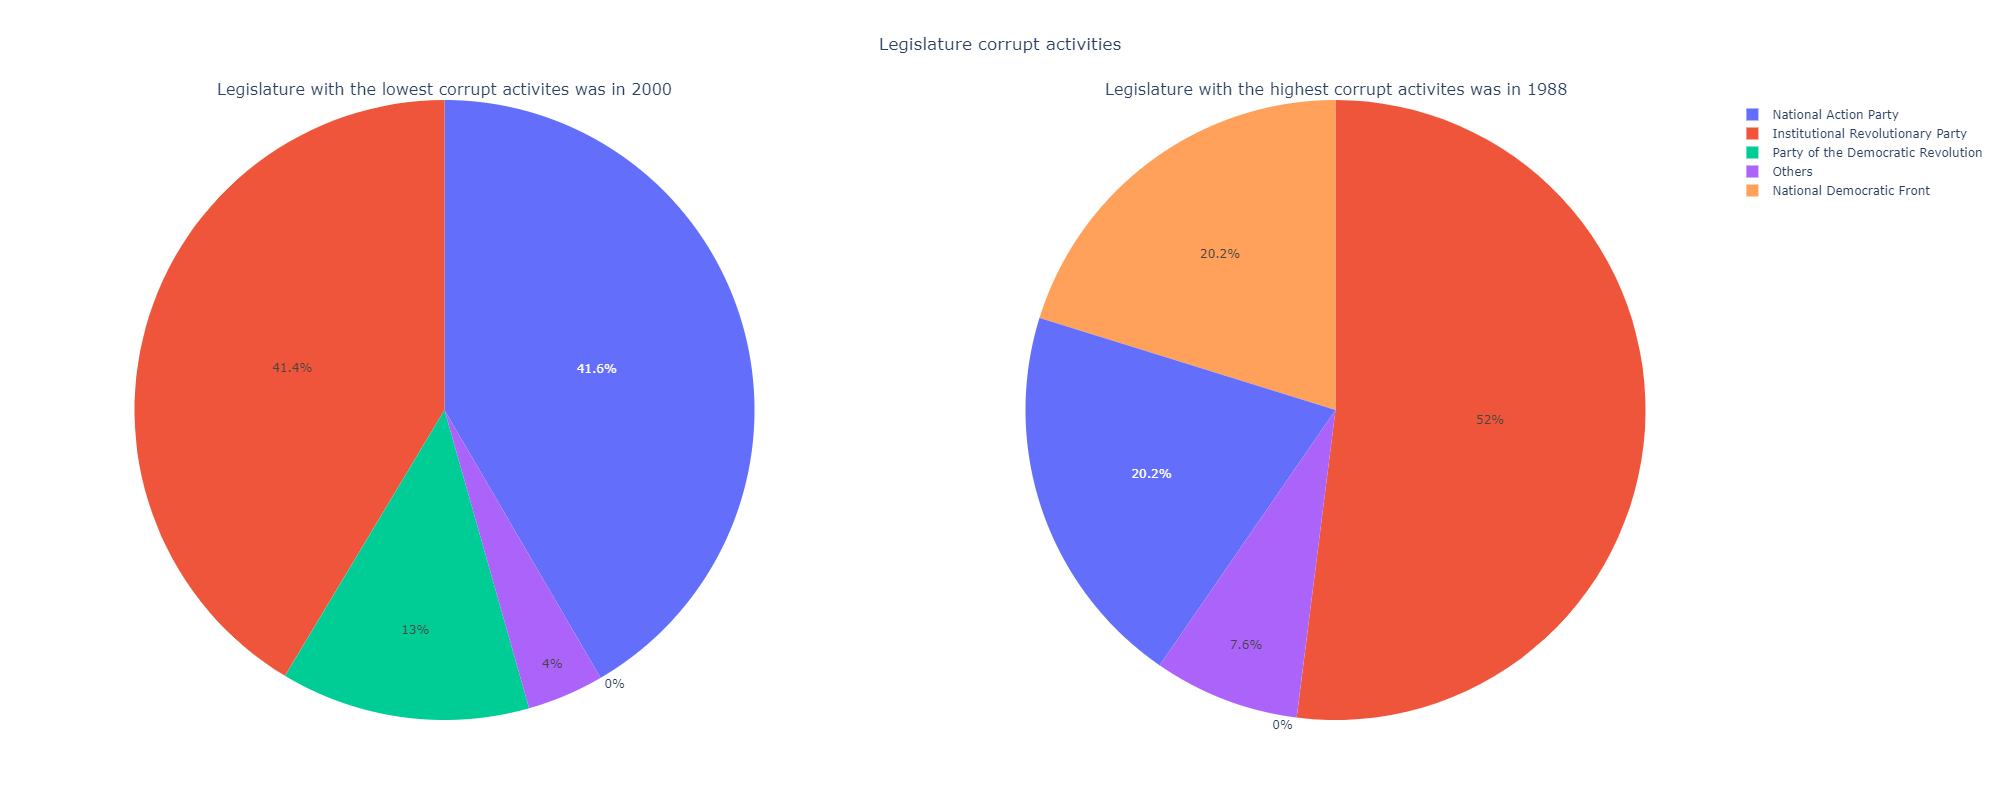

In [51]:
labels = ["Institutional Revolutionary Party", 
          "National Democratic Front", 
          "National Action Party", 
          "Party of the Democratic Revolution", 
          "Others"]

fig9 = make_subplots(rows=1, cols=2, 
                     subplot_titles=("Legislature with the lowest corrupt activites was in 2000", 
                                     "Legislature with the highest corrupt activites was in 1988"), 
                     specs=[[{'type':'domain'}, {'type':'domain'}]])

fig9.add_trace(go.Pie(labels=labels, values=[41.4, 0, 41.6, 13, 4], name=" "),
               1, 1)

fig9.add_trace(go.Pie(labels=labels, values=[52, 20.2, 20.2, 0, 7.6], name=" "),
               1, 2)

fig9.update_traces(hoverinfo="label+percent+name")

fig9.update_layout(autosize=False, width=2000, height=800, 
                   title="Legislature corrupt activities", 
                   title_x=0.5)

fig9.show()

In [52]:
df_m_l2 = df[['country_name', 'year', 'v2lgcrrpt_osp']]
df_m_l2 = df_m_l2.loc[df_m_l2['country_name'].isin(['Mexico'])]
df_m_l2 = df_m_l2[-34:]
df_m_l2 = df_m_l2[['year', 'v2lgcrrpt_osp']]
df_m_l2 = df_m_l2.reset_index(drop=True)
df_m_l2.head()

year  v2lgcrrpt_osp
0  1988          0.451
1  1989          0.613
2  1990          0.613
3  1991          0.613
4  1992          0.613

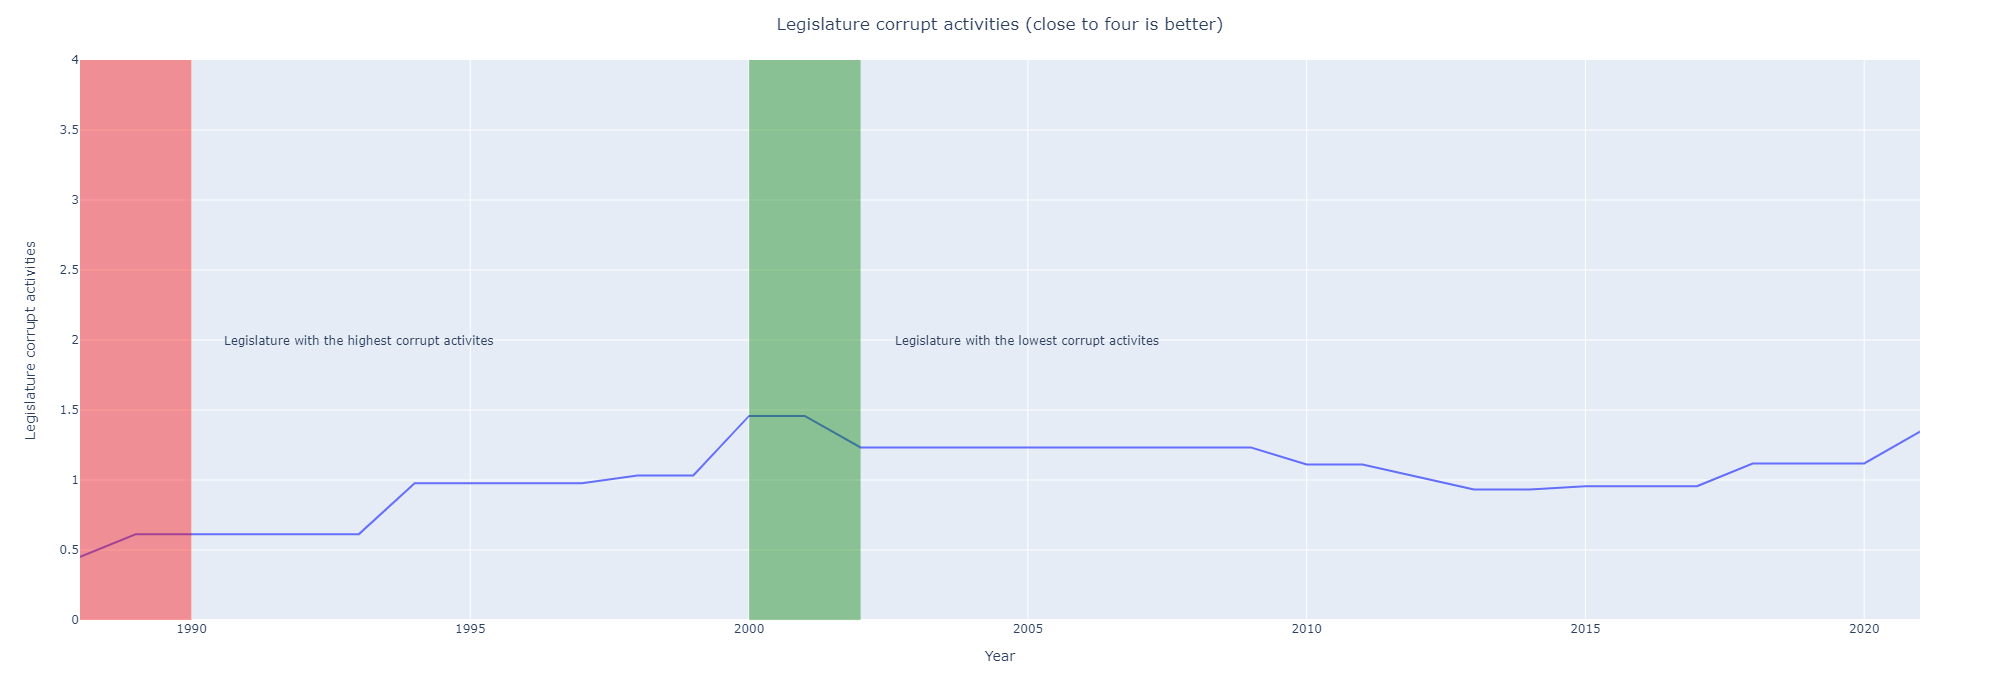

In [53]:
fig10 = px.line(df_m_l2, x='year', y='v2lgcrrpt_osp',
                  labels={"year": "Year", 
                          "v2lgcrrpt_osp": "Legislature corrupt activities"})

fig10.update_layout(autosize=False, 
                   width=2000, height=700, 
                   title="Legislature corrupt activities (close to four is better)", 
                   title_x=0.5,
                   yaxis_range=(0, 4))

fig10.add_vrect(x0=1988, x1=1990, row="all", col="all",
                fillcolor="red", opacity=0.40, line_width=0)

fig10.add_vrect(x0=2000, x1=2002, row="all", col="all",
                fillcolor="green", opacity=0.40, line_width=0)

fig10.add_annotation(x=1993, y=2,
                     text="Legislature with the highest corrupt activites",
                     showarrow=False,
                     arrowhead=1)

fig10.add_annotation(x=2005, y=2,
                     text="Legislature with the lowest corrupt activites",
                     showarrow=False,
                     arrowhead=1)

fig10.show()

### Mexico Judicitary Power

#### v2jupurge_osp: Judicial purges. [Pemstein et al. (2022)](#bibli)
Question: Judges are sometimes removed from their posts for cause, as when there is strong evidence of corruption; however, some judges are removed arbitrarily, typically for political reasons. With this distinction in mind, please describe the removal of judges that occurred
this calendar year.

Responses:
0: There was a massive, arbitrary purge of the judiciary.
1: There were limited but very important arbitrary removals.
2: There were limited arbitrary removals.
3: Judges were removed from office, but there is no evidence that the removals were arbitrary.
4: Judges were not removed from their posts.

####  v2jupoatck_osp: Government attacks on judiciary. [Pemstein et al. (2022)](#bibli) 
Question: How often did the government attack the judiciary’s integrity in public?

Responses:
0: Attacks were carried out on a daily or weekly basis.
1: Attacks were common and carried out in nearly every month of the year.
2: Attacks occurred more than once.
3: There were attacks, but they were rare.
4: There were no attacks on the judiciary’s integrity.

#### v2juaccnt_osp: Judicial accountability. [Pemstein et al. (2022)](#bibli)
Question: When judges are found responsible for serious misconduct, how often are they removed from their posts or otherwise disciplined?

Responses:
0: Never.
1: Seldom.
2: About half of the time.
3: Usually.
4: Always.

#### v2jucorrdc_osp: Judicial corruption decision. [Pemstein et al. (2022)](#bibli)
Question: How often do individuals or businesses make undocumented extra payments or bribes in order to speed up or delay the process or to obtain a favorable judicial decision?

Responses:
0: Always.
1: Usually.
2: About half of the time.
3: Not usually.
4: Never.

####  v2juhcind_osp: High court independence. [Pemstein et al. (2022)](#bibli)
Question: When the high court in the judicial system is ruling in cases that are salient to the government, how often would you say that it makes decisions that merely reflect government wishes regardless of its sincere view of the legal record?

Responses:
0: Always.
1: Usually.
2: About half of the time.
3: Seldom.
4: Never.

#### v2juhccomp_osp: Compliance with high court. [Pemstein et al. (2022)](#bibli)
Question: How often would you say the government complies with important decisions of the high court with which it disagrees?

Responses:
0: Never.
1: Seldom.
2: About half of the time.
3: Usually.
4: Always.

In [54]:
df_m_j = df[['country_name', 'year', 'v2jupurge_osp', 'v2jupoatck_osp', 'v2juaccnt_osp', 'v2jucorrdc_osp', 'v2juhcind_osp', 'v2juhccomp_osp']]
df_m_j = df_m_j.loc[df_m_j['country_name'].isin(['Mexico'])]
df_m_j = df_m_j[-34:]
df_m_j = df_m_j[['year', 'v2jupurge_osp', 'v2jupoatck_osp', 'v2juaccnt_osp', 'v2jucorrdc_osp', 'v2juhcind_osp', 'v2juhccomp_osp']]
df_m_j = df_m_j.reset_index(drop=True)
df_m_j

year  v2jupurge_osp  v2jupoatck_osp  v2juaccnt_osp  v2jucorrdc_osp  \
0   1988          2.378           3.763          1.828           1.833   
1   1989          2.378           3.763          2.243           1.833   
2   1990          2.378           3.763          2.243           1.833   
3   1991          2.378           3.763          2.243           1.833   
4   1992          2.378           3.763          2.243           1.833   
5   1993          2.378           3.763          2.243           1.833   
6   1994          1.446           3.469          2.243           1.833   
7   1995          3.457           3.834          2.173           1.833   
8   1996          3.457           3.834          2.173           1.833   
9   1997          3.457           3.834          2.173           1.833   
10  1998          3.457           3.834          2.173           1.833   
11  1999          3.457           3.834          2.173           1.833   
12  2000          3.536           3.834          2.173           1.833   
13  2001          3.536           3.834          2.173           1.833   
14  2002          3.536           3.834          2.173           1.833   
15  2003          3.536           3.834          2.173           1.833   
16  2004          3.536           3.834          2.173           1.833   
17  2005          3.536           3.834          2.173           1.833   
18  2006          3.536           3.805          2.173           1.833   
19  2007          3.536           3.673          2.173           1.833   
20  2008          3.536           3.673          2.222           1.833   
21  2009          3.536           3.494          2.222           1.833   
22  2010          3.536           3.244          2.222           1.712   
23  2011          3.536           3.244          2.222           1.712   
24  2012          3.536           3.244          2.222           1.712   
25  2013          3.217           3.857          2.185           1.551   
26  2014          3.217           3.752          2.185           1.551   
27  2015          3.217           3.752          2.185           1.828   
28  2016          3.217           3.752          2.185           1.828   
29  2017          3.225           3.732          1.779           2.127   
30  2018          3.387           2.703          1.810           2.127   
31  2019          1.989           1.659          1.972           2.127   
32  2020          2.951           1.659          1.972           2.127   
33  2021          2.947           1.256          1.935           2.538   

    v2juhcind_osp  v2juhccomp_osp  
0           1.121           2.731  
1           1.121           2.731  
2           1.121           2.731  
3           1.121           2.731  
4           1.121           2.731  
5           1.121           2.731  
6           1.635           3.069  
7           2.156           3.069  
8           2.156           3.069  
9           2.156           3.069  
10          2.156           3.069  
11          2.156           3.069  
12          2.641           3.123  
13          2.641           3.123  
14          2.641           3.123  
15          2.641           3.123  
16          2.641           3.123  
17          2.641           3.123  
18          2.641           3.123  
19          2.641           3.123  
20          2.641           3.123  
21          2.641           3.123  
22          2.791           3.032  
23          2.791           3.032  
24          2.545           3.032  
25          2.623           3.032  
26          2.623           3.032  
27          2.623           3.121  
28          2.623           3.121  
29          2.623           3.121  
30          2.503           3.121  
31          2.392           3.121  
32          1.850           2.866  
33          1.747           2.791

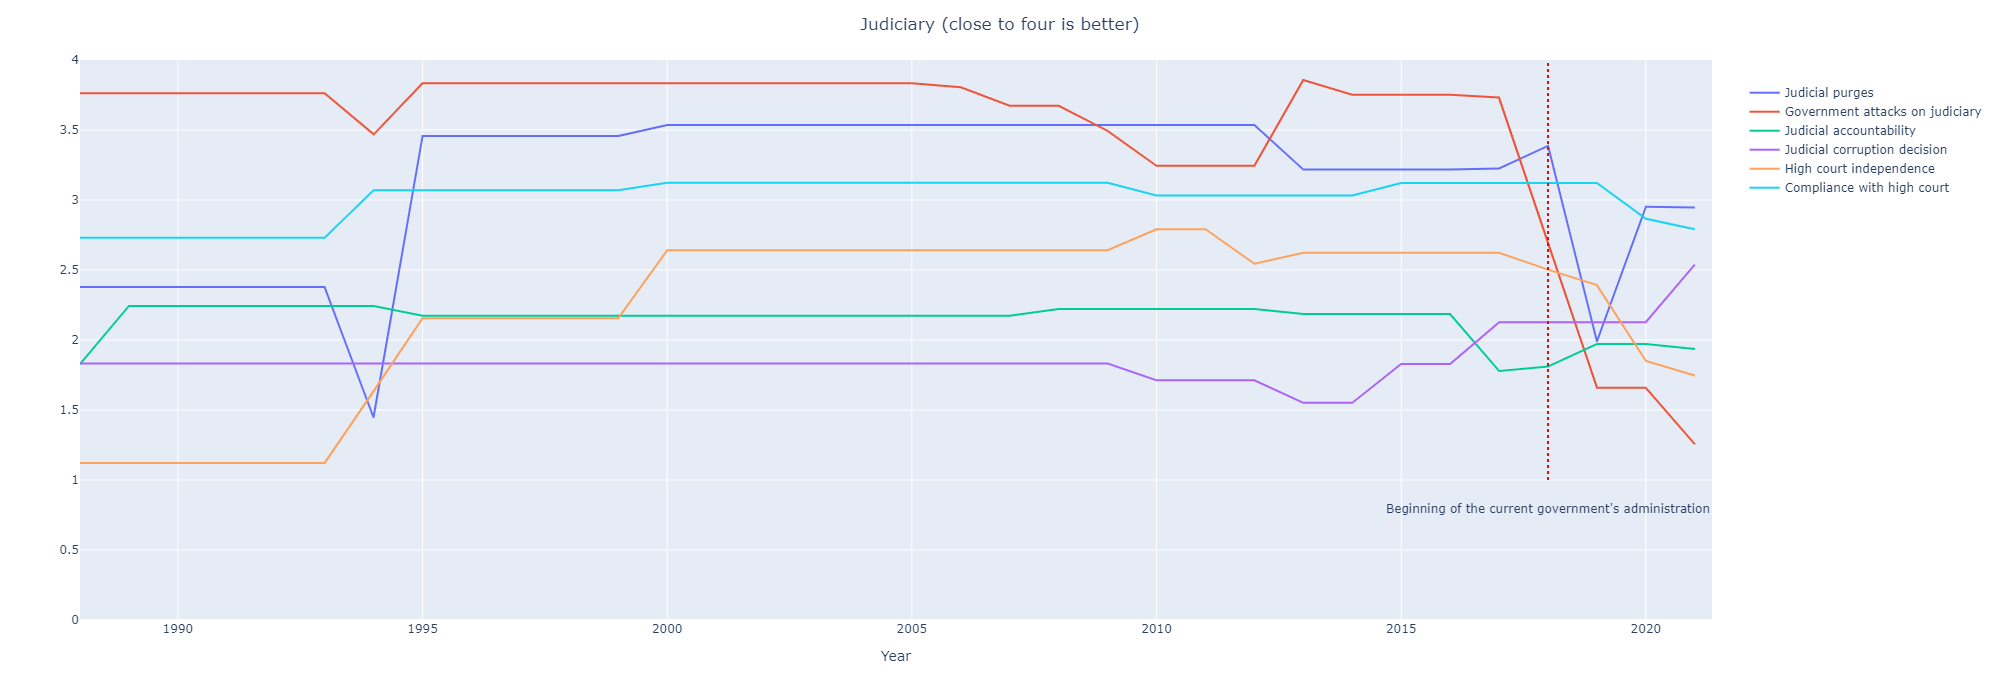

In [55]:
fig11 = px.line(df_m_j, x='year', y=['v2jupurge_osp', 'v2jupoatck_osp', 'v2juaccnt_osp', 'v2jucorrdc_osp', 'v2juhcind_osp', 'v2juhccomp_osp'],
                labels={"year": "Year", "variable": " ", "value": " "})

fig11.update_layout(autosize=False, 
                    width=2000, height=700, 
                    title="Judiciary (close to four is better)", 
                    title_x=0.5,
                    yaxis_range=(0, 4))

new_names = {"v2jupurge_osp": "Judicial purges", 
             "v2jupoatck_osp": "Government attacks on judiciary", 
             "v2juaccnt_osp": "Judicial accountability", 
             "v2jucorrdc_osp": "Judicial corruption decision", 
             "v2juhcind_osp": "High court independence", 
             "v2juhccomp_osp": "Compliance with high court"}

fig11.for_each_trace(lambda t: t.update(name = new_names[t.name],
                                        legendgroup = new_names[t.name],
                                        hovertemplate = t.hovertemplate.replace(t.name, new_names[t.name])))

fig11.add_annotation(x=2018, y=0.8,
                     text="Beginning of the current government's administration",
                     showarrow=False,
                     arrowhead=1)

fig11.add_shape(type="line",
                x0=2018, y0=1, x1=2018, y1=4,
                line=dict(color="Red",width=2, dash="dot"))

fig11.show()

## Conclusions
### World
- The 2012 was the best year in the world in terms of the Regimes of the World Index.
- Until 2021 North America, Northern Europe and Western Europe were the best regions in the world in terms of the Regimes of the World Index.
- Until 2021 South-Eastern Asia, Western Asia and Northern Africa were the worst regions in the world in terms of Regimes of the World Index.

### OECD member countries
- From 2009 to 2012 were the best years for OECD member countries in terms of the Regimes of the World Index.
- In 2021, of the 38 OECD member countries, 27 have a Liberal Democracy, 9 have an Electoral Democracy and 2 have an Electoral Autocracy.
- Hundary and Turkey are the OECD member countries that have an Electoral Autocracy.

### Mexico
- Between 2018 and 2021 the executive power has given less respect to the constitution.
- Between 1988 and 1993 there were more bribes and corrupt exchanges by the executive power.
- In 2000 executive embezzlement and theft were lower than in other periods.
- The legislature with the lowest corrupt activites was in 2000 and the legislature with the highest corrupt activites was in 1988.
- Since 2018 the judiciary power has had friction with the executive power, due to confrontations and disqualifications initiated by the government.
- The judiciary power has obtained fewer bribes to determine a decision in the last two years.

<a id='bibli'></a>

## Bibliography

Coppedge, Michael, John Gerring, Carl Henrik Knutsen, Staffan I. Lindberg, Jan Teorell, Nazifa Alizada, David Altman, Michael Bernhard, Agnes Cornell, M. Steven Fish, Lisa Gastaldi, Haakon Gjerløw, Adam Glynn, Sandra Grahn, Allen Hicken, Garry Hindle, Nina Ilchenko, Katrin Kinzelbach, Joshua Krusell, Kyle L. Marquardt, Kelly McMann, Valeriya Mechkova, Juraj Medzihorsky, Pamela Paxton, Daniel Pemstein, Josefine Pernes, Oskar Rydén, Johannes von Römer, Brigitte Seim, Rachel Sigman, Svend-Erik Skaaning, Jeffrey Staton, Aksel Sundström, Eitan Tzelgov, Yi-ting Wang, Tore Wig, Steven Wilson and Daniel Ziblatt. (2022a). "V-Dem Dataset v12" Varieties of Democracy (V-Dem) Project. URL: https://doi.org/10.23696/vdemds22.

Coppedge, Michael, John Gerring, Carl Henrik Knutsen, Staffan I. Lindberg, Jan Teorell, David Altman, Michael Bernhard, Agnes Cornell, M. Steven Fish, Lisa Gastaldi, Haakon Gjerløw, Adam Glynn, Sandra Grahn, Allen Hicken, Katrin Kinzelbach, Kyle L. Marquardt, Kelly Mc- Mann, Valeriya Mechkova, Pamela Paxton, Daniel Pemstein, Johannes von R¨omer, Brigitte Seim, Rachel Sigman, Svend-Erik Skaaning, Jeffrey Staton, Eitan Tzelgov, Luca Uberti, Yi-ting Wang, Tore Wig, and Daniel Ziblatt. (2022b). ”V-Dem Codebook v12” Varieties of Democracy (V-Dem) Project. https://doi.org/10.23696/vdemds22.

Lührmann, A., Tannenberg, M. & Lindberg, S. I. (2018). Regimes of the World (RoW): Opening New Avenues for the Comparative Study of Political Regimes. Politics and Governance 6(1). 4.

Salazar, Francisco (2004). Globalización y políticaneoliberal en México. El Cotidiano, 20(126),0. ISSN: 0186-1840. URL: https://www.redalyc.org/articulo.oa?id=32512604

Instituo Nacional Electoral. (n.d.). Historia del Instituto Federal Electoral. Historia. URL: https://portalanterior.ine.mx/archivos3/portal/historico/contenido/menuitem.cdd858023b32d5b7787e6910d08600a0/

Fariss, C., Anders, T., Markowitz, J. & Barnum, M. (2021). Replication Data for: New Estimates of Over 500 Years of Historic GDP and Population Data. URL: https://doi.org/10.7910/DVN/DC0ING

Pemstein, D., Marquardt, K. L., Tzelgov, E., Wang, Y., Medzihorsky, J., Krusell, J., Miri, F. & von Römer, J. (2022). The V-Dem Measurement Model: Latent Variable Analysis for Cross-National and Cross-Temporal Expert-Coded Data. V-Dem Working Paper Series 2022(21). URL: https://www.v-dem.net/media/publications/Working_Paper_21.pdf

Cámara de Diputados. (2022). Tus diputados. Diputados(as) en Pleno. URL: https://web.diputados.gob.mx/inicio/tusDiputados